# Predicting NBA Player Performance: A Neural Network Approach to Analyzing Seasonal Statistics

## Name
 - Shay Samat

## Preprocessing

In [1]:
#imports
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.optimizers import SGD

2024-03-20 14:11:45.556586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
nba2021reg_data = pd.read_csv("2021-2022 NBA Player Stats - Regular.csv", sep=';', encoding = 'latin1')
nba2021playoff_data = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv", sep=';', encoding = 'latin1')

In [3]:
nba2021reg_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [4]:
nba2021playoff_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3


In [5]:
nba2022reg_data = pd.read_csv("2022-2023 NBA Player Stats - Regular.csv", sep=';', encoding = 'latin1')
nba2022playoff_data = pd.read_csv("2022-2023 NBA Player Stats - Playoffs.csv", sep=';', encoding = 'latin1')

In [6]:
nba2022reg_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [7]:
nba2022playoff_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,...,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
1,2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,...,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
2,3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,...,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
3,4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,...,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
4,5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,...,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4


In [8]:
nba2021reg_data.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [9]:
nba2022reg_data.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [10]:
def update_positions(position):
    if '-' in position:
        return position.split('-')[0]
    else:
        return position

nba2021reg_data['Pos'] = nba2021reg_data['Pos'].apply(update_positions)
nba2022reg_data['Pos'] = nba2022reg_data['Pos'].apply(update_positions)

In [11]:
nba2021reg_data2= pd.get_dummies(nba2021reg_data, columns=['Tm', 'Pos'])
nba2022reg_data2= pd.get_dummies(nba2022reg_data, columns=['Tm', 'Pos'])

In [12]:
merged_data = pd.merge(nba2021reg_data2, nba2022reg_data2, on='Player', suffixes=('_2021', '_2022'))

In [13]:
merged_data

,Rk_2021,Player,Age_2021,G_2021,GS_2021,MP_2021,FG_2021,FGA_2021,FG%_2021,3P_2021,...,Tm_SAS_2022,Tm_TOR_2022,Tm_TOT_2022,Tm_UTA_2022,Tm_WAS_2022,Pos_C_2022,Pos_PF_2022,Pos_PG_2022,Pos_SF_2022,Pos_SG_2022
0,1,Precious Achiuwa,22,73,28,23.6,3.6,8.3,0.439,0.8,...,0,1,0,0,0,1,0,0,0,0
1,2,Steven Adams,28,76,75,26.3,2.8,5.1,0.547,0.0,...,0,0,0,0,0,1,0,0,0,0
2,3,Bam Adebayo,24,56,56,32.6,7.3,13.0,0.557,0.0,...,0,0,0,0,0,1,0,0,0,0
3,4,Santi Aldama,21,32,0,11.3,1.7,4.1,0.402,0.2,...,0,0,0,0,0,0,1,0,0,0
4,6,Nickeil Alexander-Walker,23,65,21,22.6,3.9,10.5,0.372,1.6,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,601,Thaddeus Young,33,26,0,18.3,2.6,5.5,0.465,0.7,...,0,1,0,0,0,0,1,0,0,0
713,602,Trae Young,23,76,76,34.9,9.4,20.3,0.460,3.1,...,0,0,0,0,0,0,0,1,0,0
714,603,Omer Yurtseven,23,56,12,12.6,2.3,4.4,0.526,0.0,...,0,0,0,0,0,1,0,0,0,0
715,604,Cody Zeller,29,27,0,13.1,1.9,3.3,0.567,0.0,...,0,0,0,0,0,1,0,0,0,0


# EDA

## 2021 Stats EDA

### Histogram of PPG

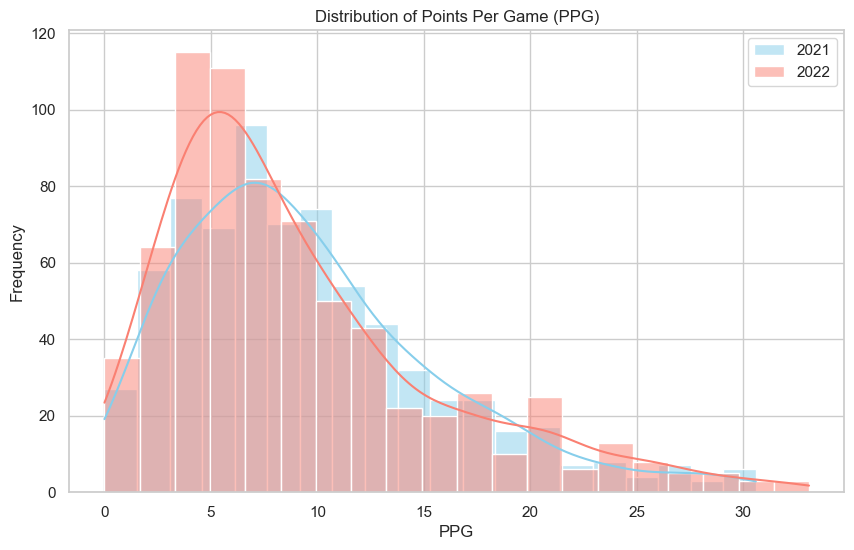

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='PTS_2021', bins=20, kde=True, color='skyblue', label='2021')
sns.histplot(data=merged_data, x='PTS_2022', bins=20, kde=True, color='salmon', label='2022')
plt.title('Distribution of Points Per Game (PPG)')
plt.xlabel('PPG')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Boxplot of PPG by Position

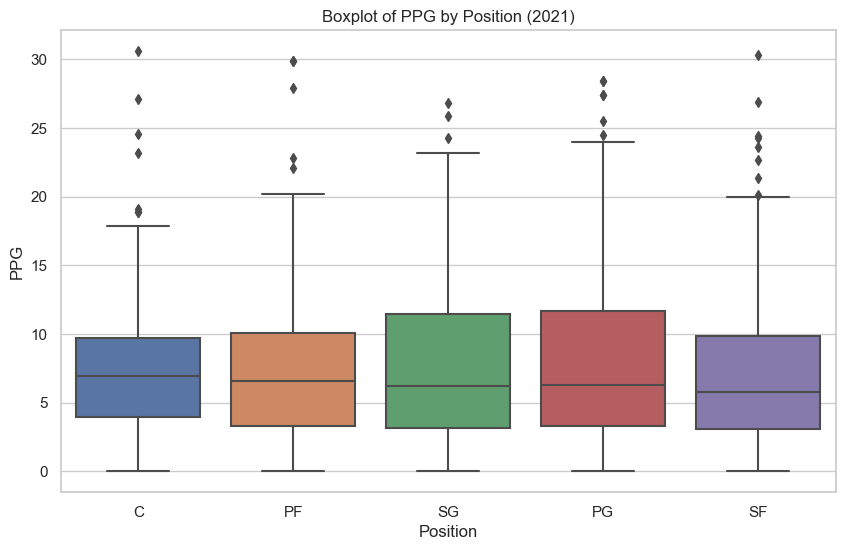

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nba2021reg_data, x='Pos', y='PTS')
plt.title('Boxplot of PPG by Position (2021)')
plt.xlabel('Position')
plt.ylabel('PPG')
plt.show()

### Scatter Plot of PPG vs. Age

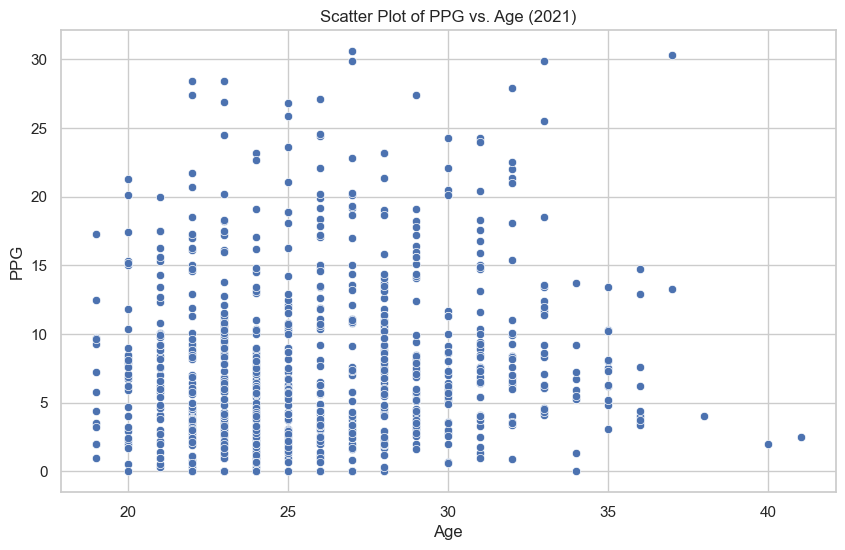

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba2021reg_data, x='Age', y='PTS')
plt.title('Scatter Plot of PPG vs. Age (2021)')
plt.xlabel('Age')
plt.ylabel('PPG')
plt.show()

### Pairplot of Selected Features

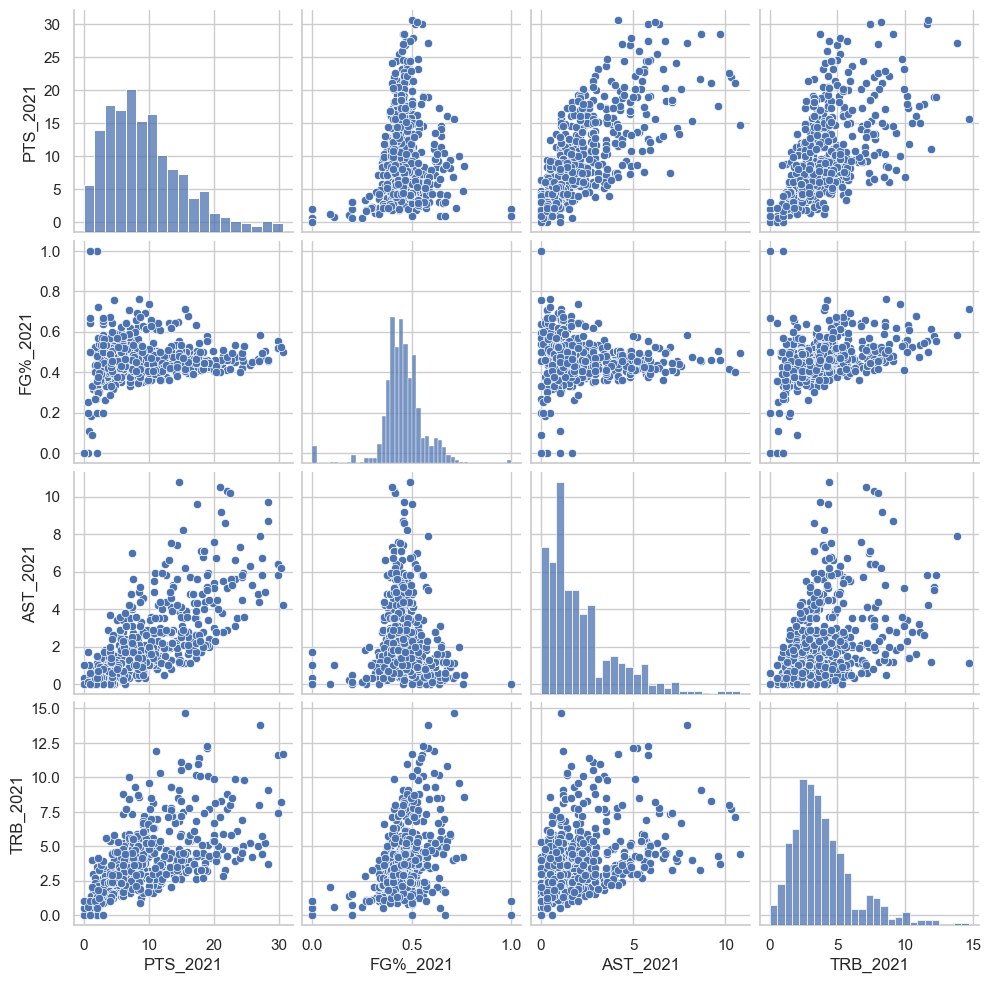

In [17]:

selected_features = ['PTS_2021', 'FG%_2021', 'AST_2021', 'TRB_2021']
sns.pairplot(merged_data[selected_features])
plt.show()

### Bar Plot of Average PPG by Team

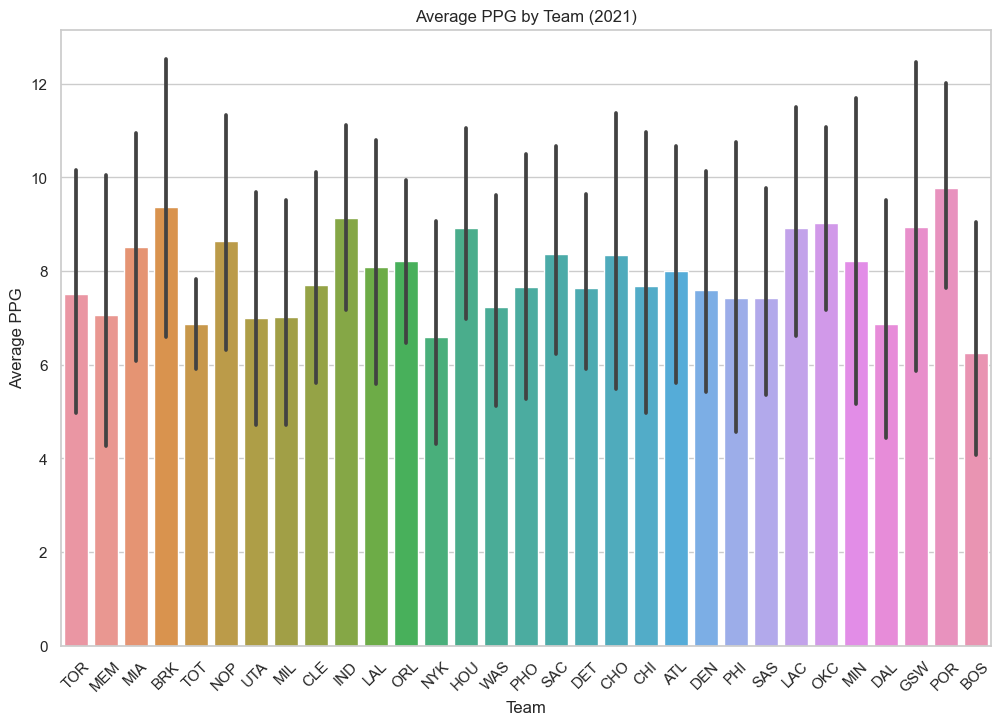

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=nba2021reg_data, x='Tm', y='PTS')
plt.title('Average PPG by Team (2021)')
plt.xlabel('Team')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()

### Line Plot of PPG Trend Over Games Played

/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/2390462800.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_data, x='G_2021', y='PTS_2021', marker='o', ci=None)


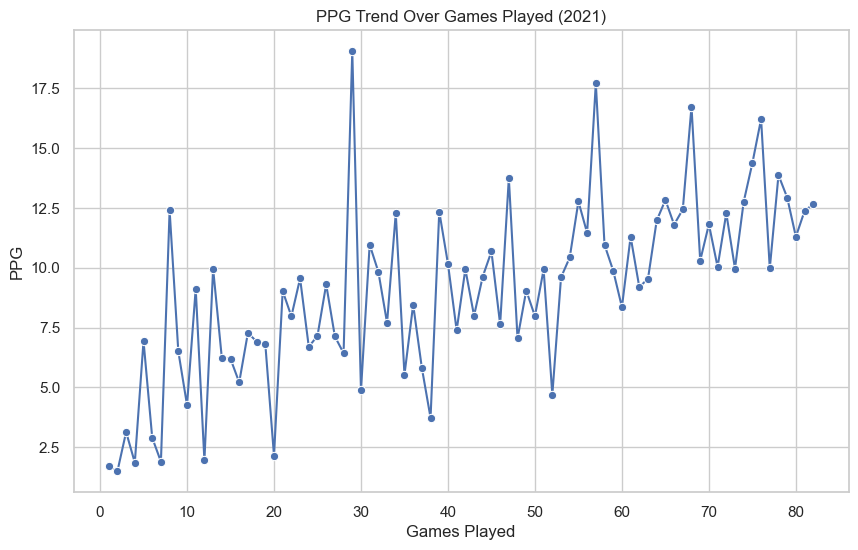

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='G_2021', y='PTS_2021', marker='o', ci=None)
plt.title('PPG Trend Over Games Played (2021)')
plt.xlabel('Games Played')
plt.ylabel('PPG')
plt.show()

### Distribution of Player Positions

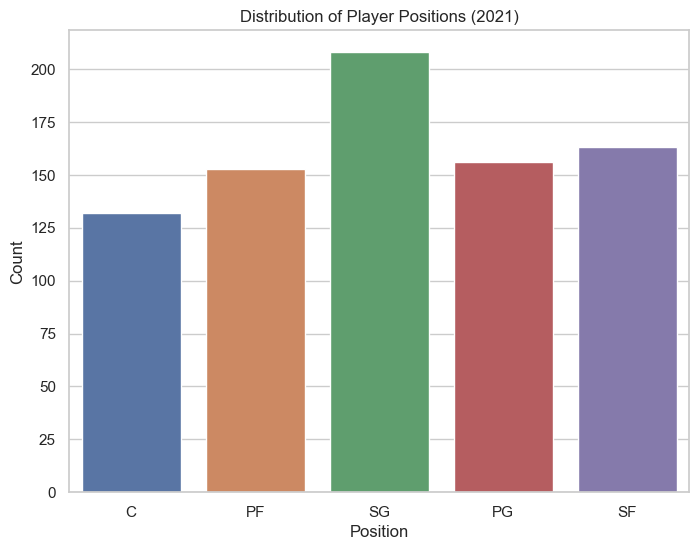

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=nba2021reg_data, x='Pos')
plt.title('Distribution of Player Positions (2021)')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

### Boxplot of PPG by Team

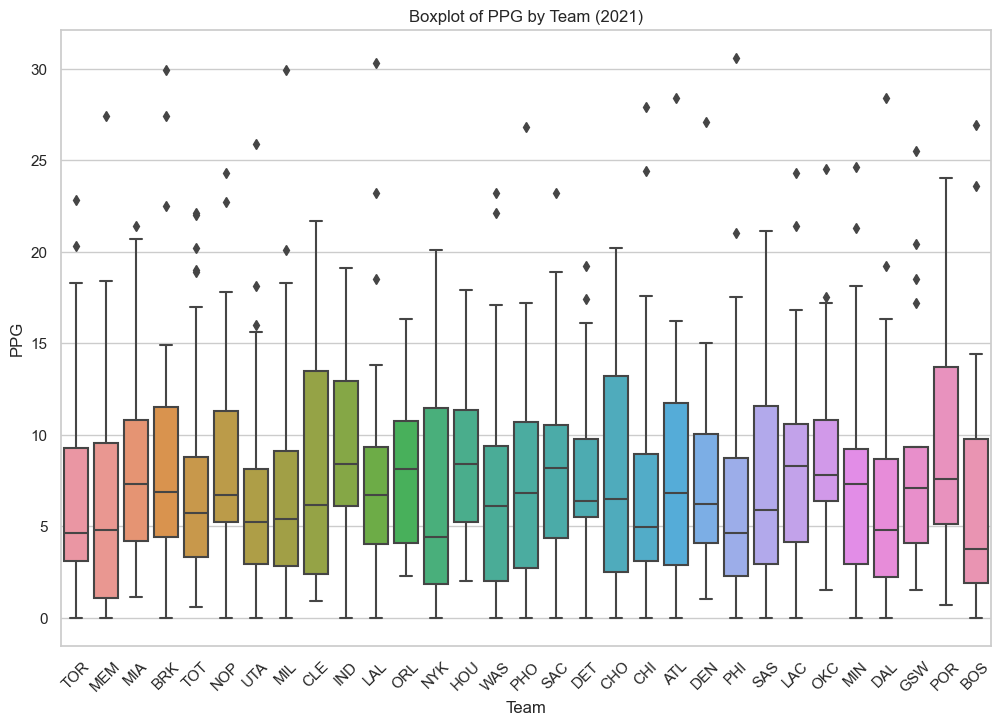

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nba2021reg_data, x='Tm', y='PTS')
plt.title('Boxplot of PPG by Team (2021)')
plt.xlabel('Team')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.show()


### Pie Chart of Position Distribution

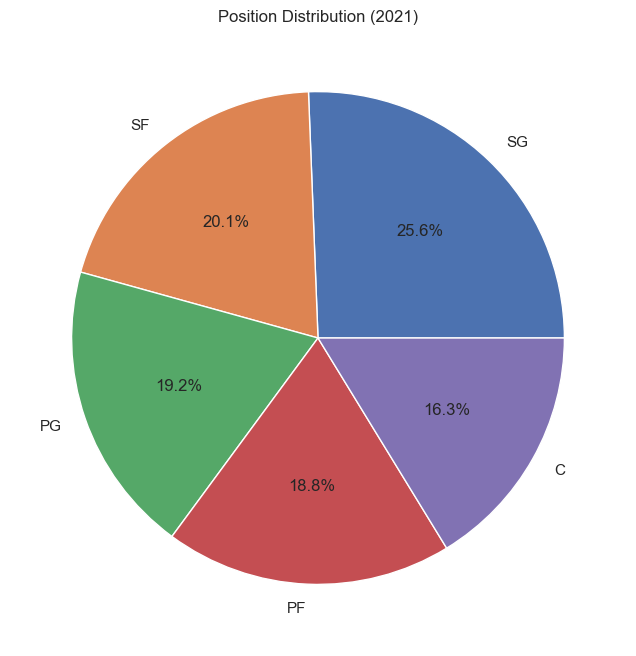

In [22]:
plt.figure(figsize=(8, 8))
nba2021reg_data['Pos'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Position Distribution (2021)')
plt.ylabel('')
plt.show()

## 2022 Stats EDA

### Boxplot of PPG by Position

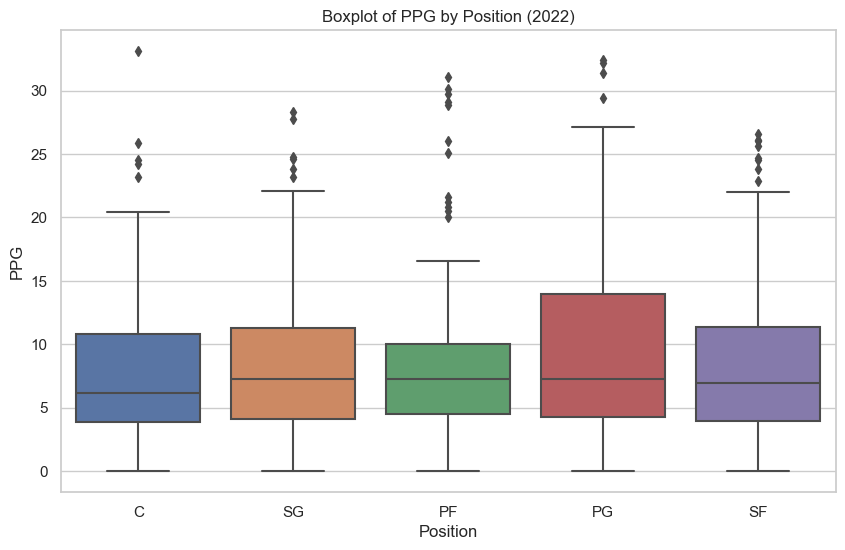

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nba2022reg_data, x='Pos', y='PTS')
plt.title('Boxplot of PPG by Position (2022)')
plt.xlabel('Position')
plt.ylabel('PPG')
plt.show()

### Scatter Plot of PPG vs. Age

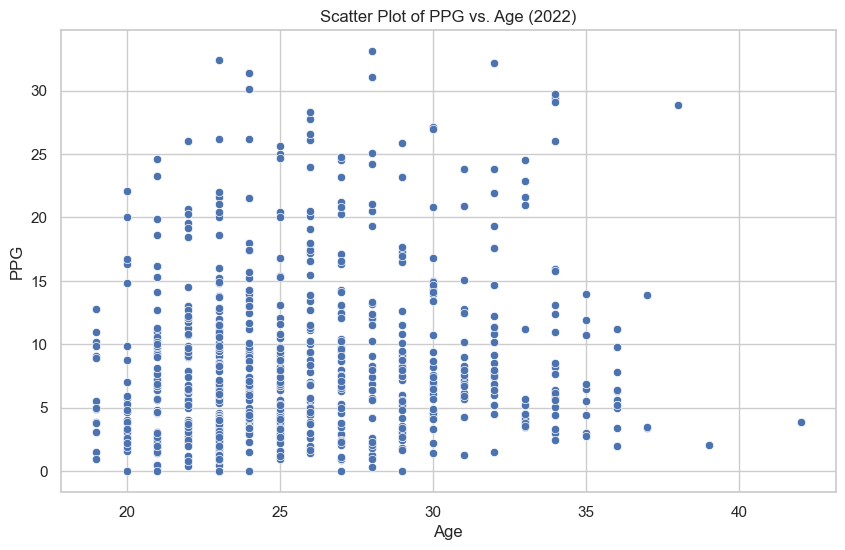

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba2022reg_data, x='Age', y='PTS')
plt.title('Scatter Plot of PPG vs. Age (2022)')
plt.xlabel('Age')
plt.ylabel('PPG')
plt.show()

### Pairplot of Selected Features

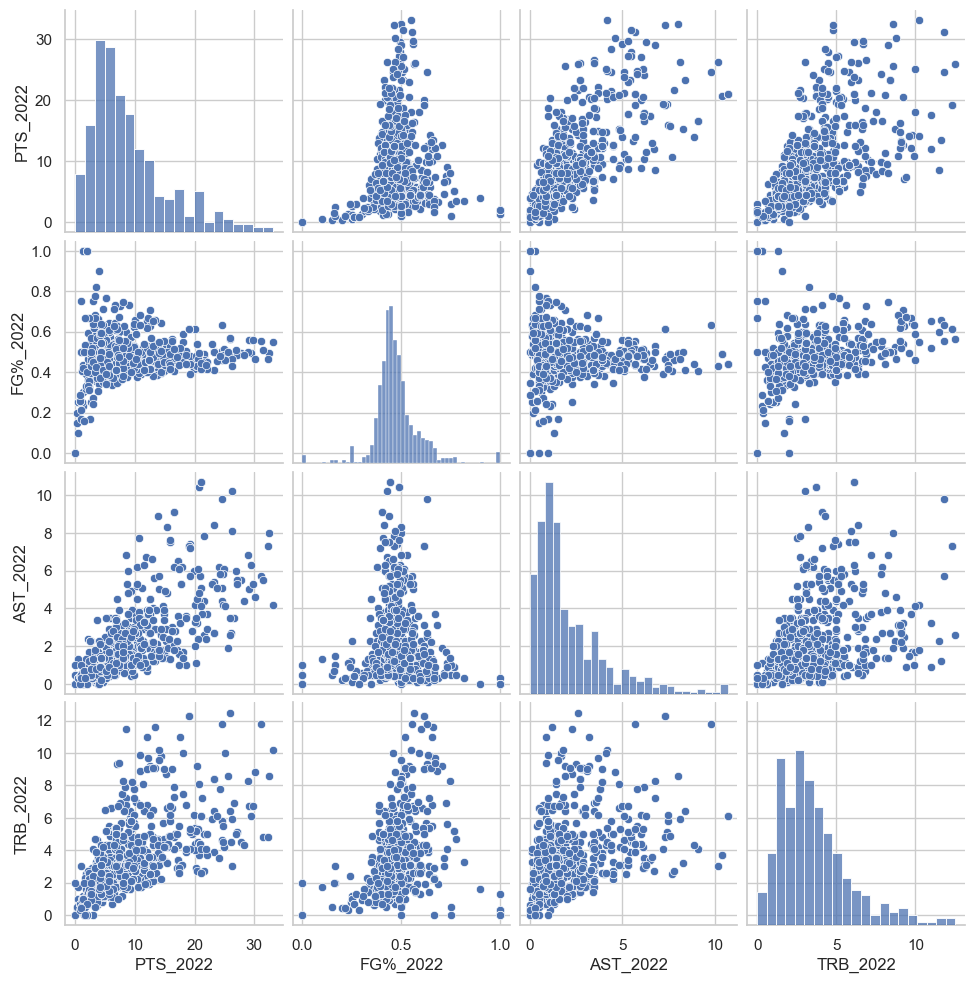

In [25]:

selected_features = ['PTS_2022', 'FG%_2022', 'AST_2022', 'TRB_2022']
sns.pairplot(merged_data[selected_features])
plt.show()

### Bar Plot of Average PPG by Team

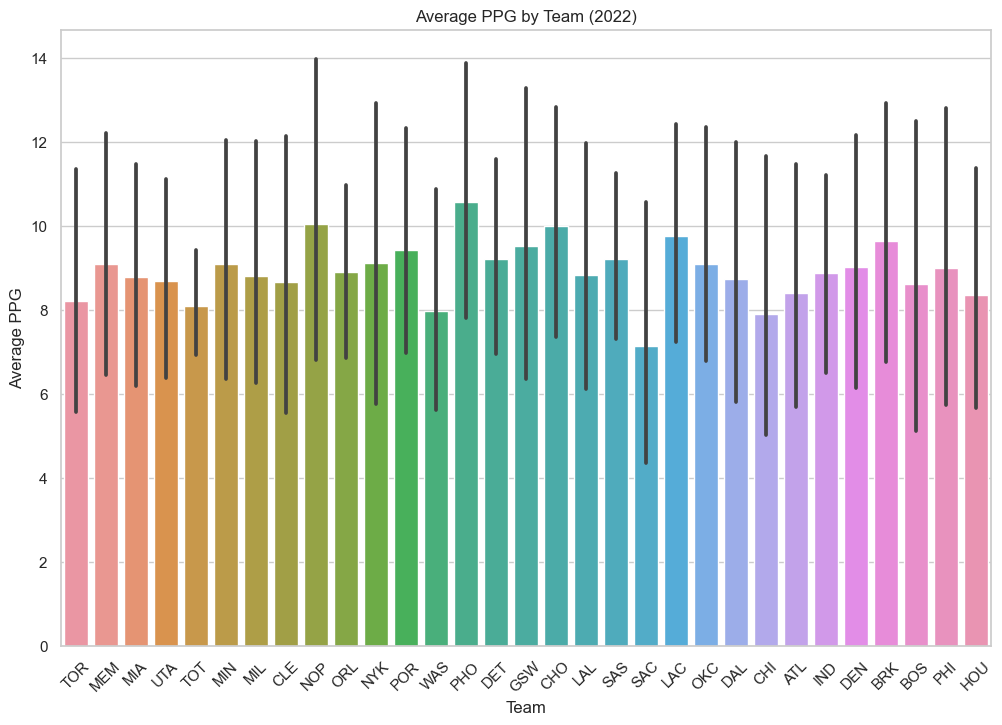

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data=nba2022reg_data, x='Tm', y='PTS')
plt.title('Average PPG by Team (2022)')
plt.xlabel('Team')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()

### Line Plot of PPG Trend Over Games Played

/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/1781535333.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_data, x='G_2022', y='PTS_2022', marker='o', ci=None)


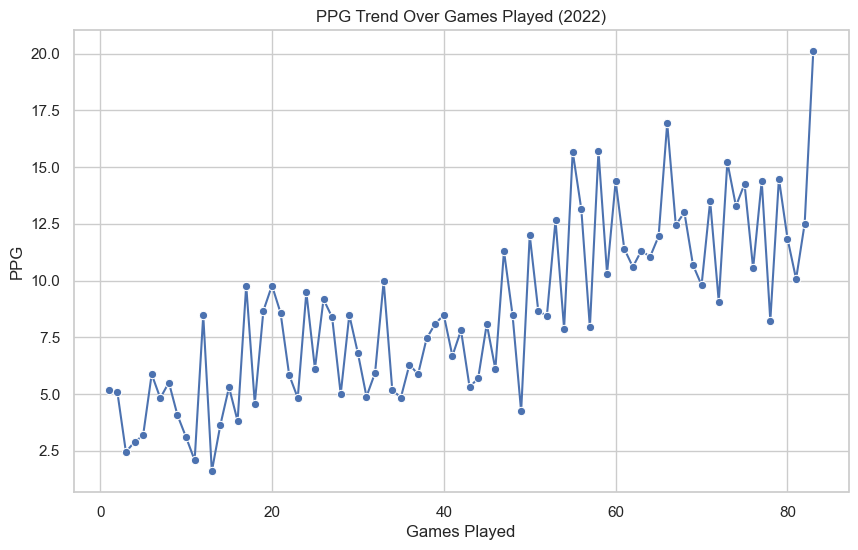

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='G_2022', y='PTS_2022', marker='o', ci=None)
plt.title('PPG Trend Over Games Played (2022)')
plt.xlabel('Games Played')
plt.ylabel('PPG')
plt.show()

### Distribution of Player Positions

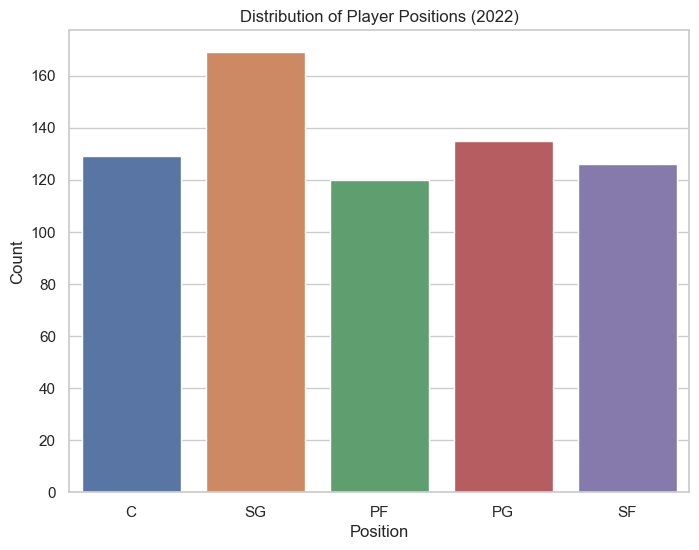

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=nba2022reg_data, x='Pos')
plt.title('Distribution of Player Positions (2022)')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

### Boxplot of PPG by Team

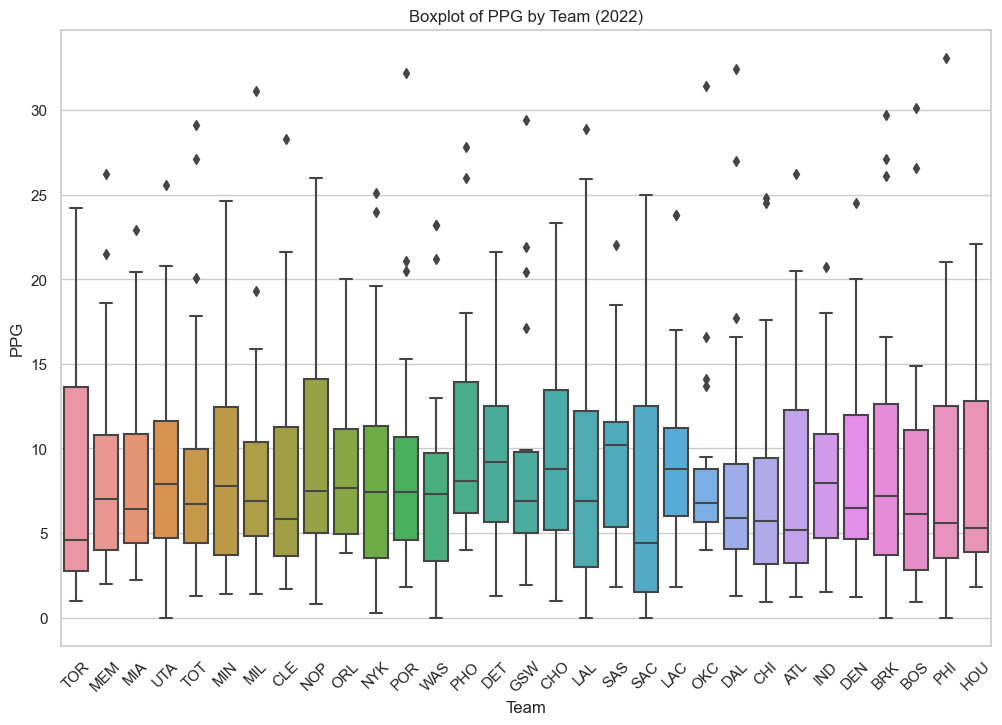

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nba2022reg_data, x='Tm', y='PTS')
plt.title('Boxplot of PPG by Team (2022)')
plt.xlabel('Team')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.show()


### Pie Chart of Position Distribution

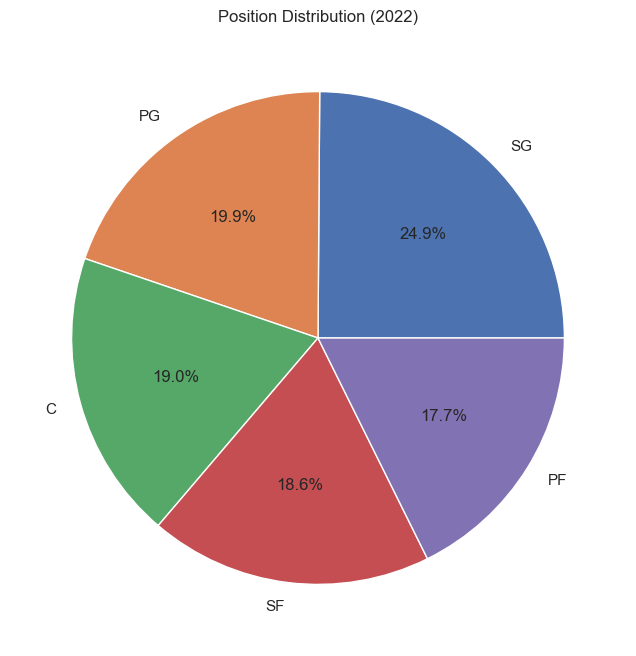

In [30]:
plt.figure(figsize=(8, 8))
nba2022reg_data['Pos'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Position Distribution (2022)')
plt.ylabel('')
plt.show()

# Baseline PPG (Linear Regression)

In [31]:
features_2021 = [col for col in merged_data.columns if '_2021' in col and col not in ('PTS_2021', 'Player', 'Rk_2021')]
features_2022 = [col.replace('_2021', '_2022') for col in features_2021]

target_2021 = 'PTS_2021'
target_2022 = 'PTS_2022'

# Training set from 2021
X_train = merged_data[features_2021]
y_train = merged_data[target_2021]

# Testing set from 2022
X_test = merged_data[features_2022]
y_test = merged_data[target_2022]

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

X_test.columns = [col.replace('_2022', '_2021') for col in X_test.columns]
y_pred = model.predict(X_test)

msebl = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(msebl)
mae = mean_absolute_error(y_pred, y_test)
r_squaredbl = r2_score(y_pred, y_test)

print("Mean Squared Error:", msebl)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squaredbl)

Mean Squared Error: 0.005881559882881518
Root Mean Squared Error: 0.07669132860292302
Mean Absolute Error: 0.06163769073563986
R-squared: 0.9998611070680655


In [33]:
predictions_dfbl = pd.DataFrame({'Baseline_Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_dfbl, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
comparison_df


,Player,Baseline_Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.248023,9.2
1,Steven Adams,8.483256,8.6
2,Bam Adebayo,20.296080,20.4
3,Santi Aldama,9.016186,9.0
4,Nickeil Alexander-Walker,6.099449,6.2
...,...,...,...
712,Thaddeus Young,4.366463,4.4
713,Trae Young,26.271774,26.2
714,Omer Yurtseven,4.457569,4.4
715,Cody Zeller,6.581843,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/433773632.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test[0:50], 'ro', color ='red', alpha=0.5)


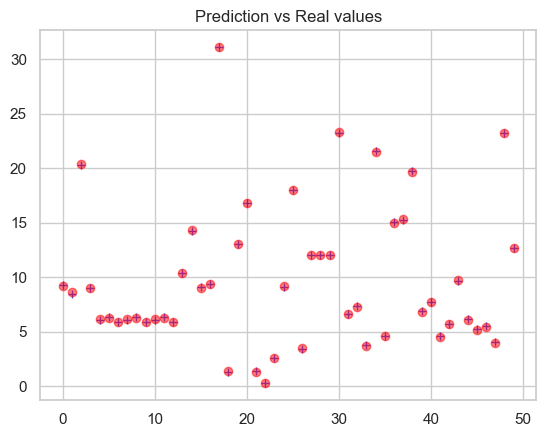

In [34]:
plt.plot(y_pred[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_test[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

# Neural Network Model for Point Prediction

## Model One (3 Layers)

In [35]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3968      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
18/18 [==============================] - 0s 978us/step - loss: 0.0554 - mse: 0.0554
Training MSE: 0.055436231195926666
23/23 [==============================] - 0s 754us/step - loss: 0.1225 - mse: 0.1225
Validation MSE: 0.12250213325023651 

Step :  250 / 1000
18/18 [==============================] - 0s 941us/step - loss: 0.0083 - mse: 0.0083
Training MSE: 0.00827525369822979
23/23 [==============================] - 0s 866us/step - loss: 0.0325 - mse: 0.0325
Validation MSE: 0.03250379115343094 

Step :  500 / 1000
18/18 [==============================] - 0s 904us/step - loss: 0.0046 - mse: 0.0046
Training MSE: 0.004553804639726877
23/23 [==============================] - 0s 773us/step - loss: 0.0232 - mse: 0.0232
Validation MSE: 0.02323070913553238 

Step :  750 / 1000
18/18 [==============================] - 0s 923us/step - loss: 0.0027 - mse: 0.0027
Training MSE: 0.0027108220383524895
23/23 [==============================] - 0s 893us/step - loss: 0.0200 - mse: 0.0200


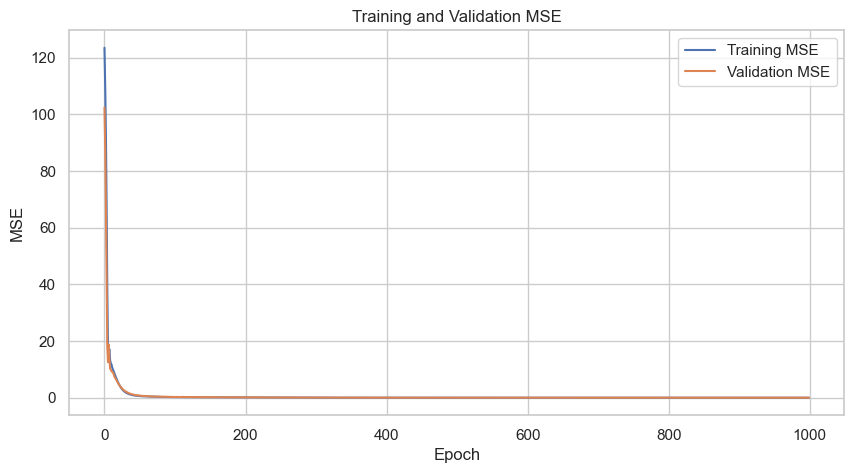

In [37]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(X_test, verbose=0)
r21 = r2_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.9995281846914978 / 1.0
MSE score =  0.02000244734303654 / 0.0


In [39]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M1 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.264854,9.2
1,Steven Adams,8.441302,8.6
2,Bam Adebayo,20.206554,20.4
3,Santi Aldama,9.053696,9.0
4,Nickeil Alexander-Walker,6.107965,6.2
...,...,...,...
712,Thaddeus Young,4.472678,4.4
713,Trae Young,26.300997,26.2
714,Omer Yurtseven,4.547391,4.4
715,Cody Zeller,6.524929,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


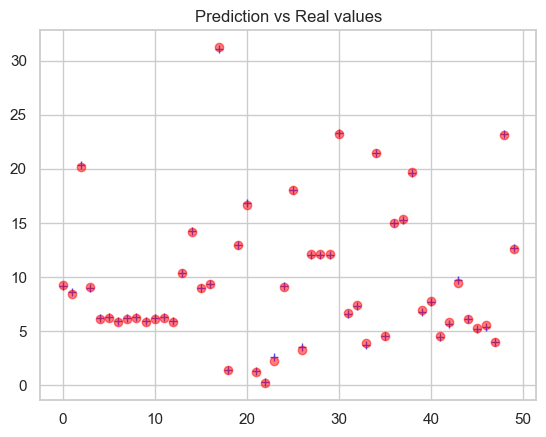

In [40]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Two (More Layers)

In [41]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               12400     
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 100)               15100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

In [42]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0220 - mse: 0.0220
Training MSE: 0.021997032687067986
23/23 [==============================] - 0s 900us/step - loss: 0.0756 - mse: 0.0756
Validation MSE: 0.07564380019903183 

Step :  250 / 1000
15/15 [==============================] - 0s 975us/step - loss: 0.0046 - mse: 0.0046
Training MSE: 0.004600211512297392
23/23 [==============================] - 0s 1ms/step - loss: 0.0367 - mse: 0.0367
Validation MSE: 0.036738116294145584 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0101
Training MSE: 0.010062105022370815
23/23 [==============================] - 0s 1ms/step - loss: 0.0380 - mse: 0.0380
Validation MSE: 0.038000158965587616 

Step :  750 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0318 - mse: 0.0318
Training MSE: 0.031772319227457047
23/23 [==============================] - 0s 1ms/step - loss: 0.0652 - mse: 0.0652
Validation

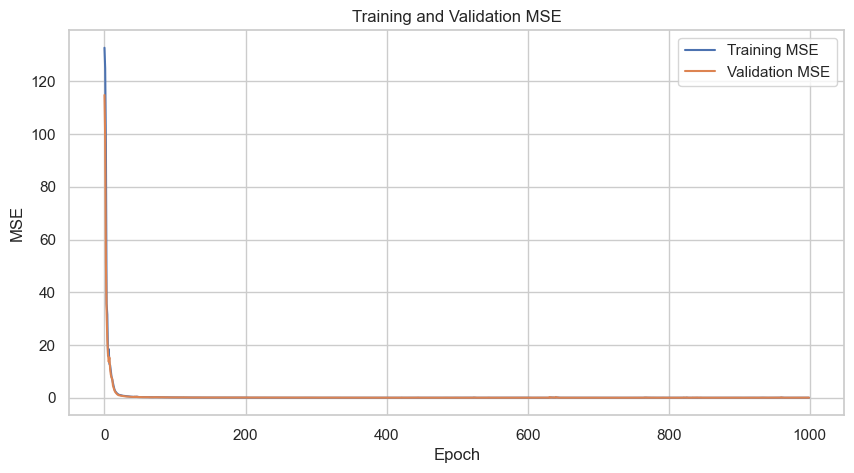

In [43]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
y_pred = model.predict(X_test, verbose=0)
r22 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.998462396100617 / 1.0
MSE score =  0.06518618721697067 / 0.0


In [45]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M2 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.229930,9.2
1,Steven Adams,8.478462,8.6
2,Bam Adebayo,20.056904,20.4
3,Santi Aldama,8.813239,9.0
4,Nickeil Alexander-Walker,5.882273,6.2
...,...,...,...
712,Thaddeus Young,4.253738,4.4
713,Trae Young,26.058847,26.2
714,Omer Yurtseven,4.463167,4.4
715,Cody Zeller,6.381407,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


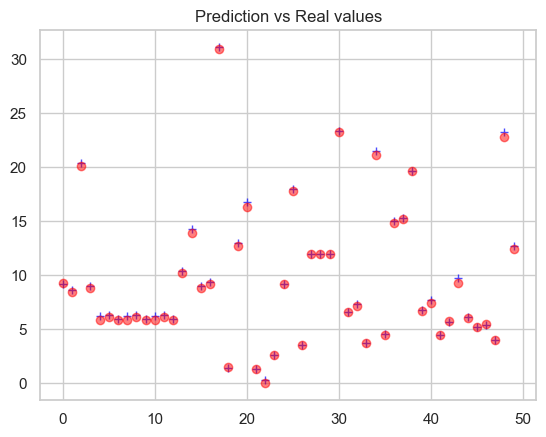

In [46]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Three (Different Optimizer)

In [47]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer= SGD(lr=0.001), metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               12400     
                                                                 
 dense_10 (Dense)            (None, 150)               30150     
                                                                 
 dense_11 (Dense)            (None, 100)               15100     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [48]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 14.5552 - mse: 14.5552
Training MSE: 14.555176734924316
23/23 [==============================] - 0s 1ms/step - loss: 16.1274 - mse: 16.1274
Validation MSE: 16.127399444580078 

Step :  250 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 6.2322 - mse: 6.2322
Training MSE: 6.232193946838379
23/23 [==============================] - 0s 965us/step - loss: 7.4846 - mse: 7.4846
Validation MSE: 7.4845709800720215 

Step :  500 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0337 - mse: 1.0337
Training MSE: 1.033712387084961
23/23 [==============================] - 0s 1000us/step - loss: 1.6001 - mse: 1.6001
Validation MSE: 1.600121021270752 

Step :  750 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 4.5152 - mse: 4.5152
Training MSE: 4.515230655670166
23/23 [==============================] - 0s 1ms/step - loss: 5.5995 - mse: 5.5995
Validation MSE: 5.5994

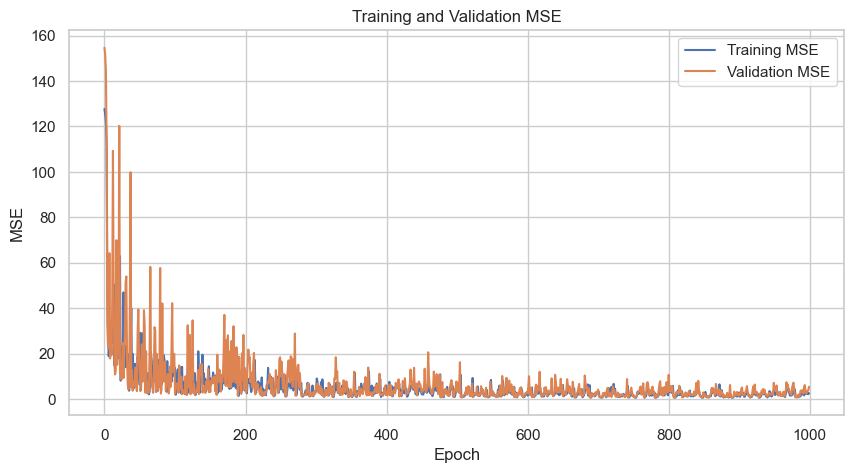

In [49]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
y_pred = model.predict(X_test, verbose=0)
r23 = r2_score(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8679200035469874 / 1.0
MSE score =  5.599485914322886 / 0.0


In [51]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M3 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,7.964994,9.2
1,Steven Adams,7.752193,8.6
2,Bam Adebayo,16.660534,20.4
3,Santi Aldama,7.444430,9.0
4,Nickeil Alexander-Walker,4.980370,6.2
...,...,...,...
712,Thaddeus Young,3.120915,4.4
713,Trae Young,21.904221,26.2
714,Omer Yurtseven,3.118481,4.4
715,Cody Zeller,4.675313,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


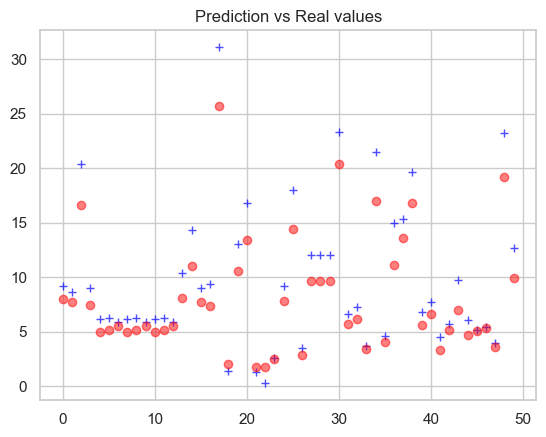

In [52]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Comparison

In [53]:
comparison_df = pd.concat([predictions_dfbl,predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,Baseline_Predicted_PTS_2022,M1 - Predicted_PTS_2022,M2 - Predicted_PTS_2022,M3 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.248023,9.264854,9.229930,7.964994,9.2
1,Steven Adams,8.483256,8.441302,8.478462,7.752193,8.6
2,Bam Adebayo,20.296080,20.206554,20.056904,16.660534,20.4
3,Santi Aldama,9.016186,9.053696,8.813239,7.444430,9.0
4,Nickeil Alexander-Walker,6.099449,6.107965,5.882273,4.980370,6.2
...,...,...,...,...,...,...
712,Thaddeus Young,4.366463,4.472678,4.253738,3.120915,4.4
713,Trae Young,26.271774,26.300997,26.058847,21.904221,26.2
714,Omer Yurtseven,4.457569,4.547391,4.463167,3.118481,4.4
715,Cody Zeller,6.581843,6.524929,6.381407,4.675313,6.5


In [54]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Baseline (Linear Regression)','One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'MSE': [msebl,mse1, mse2, mse3],
    'R2 Score': [r_squaredbl, r21, r22, r23]
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                          Model       MSE  R2 Score
0  Baseline (Linear Regression)  0.005882  0.999861
1                One (3 Layers)  0.020002  0.999528
2             Two (More Layers)  0.065186  0.998462
3         Three (SGD Optimizer)  5.599486  0.867920


# Baseline AST (Linear Regression)

In [55]:
features_2021 = [col for col in merged_data.columns if '_2021' in col and col not in ('AST_2021', 'Player', 'Rk_2021')]
features_2022 = [col.replace('_2021', '_2022') for col in features_2021]

target_2021 = 'AST_2021'
target_2022 = 'AST_2022'

# Training set from 2021
X_train = merged_data[features_2021]
y_train = merged_data[target_2021]

# Testing set from 2022
X_test = merged_data[features_2022]
y_test = merged_data[target_2022]

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

X_test.columns = [col.replace('_2022', '_2021') for col in X_test.columns]
y_pred = model.predict(X_test)

msebl = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(msebl)
mae = mean_absolute_error(y_pred, y_test)
r_squaredbl = r2_score(y_pred, y_test)

print("Mean Squared Error:", msebl)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squaredbl)

Mean Squared Error: 0.7641944841016322
Root Mean Squared Error: 0.8741821801556195
Mean Absolute Error: 0.6244713124964689
R-squared: 0.7484546692313266


In [57]:
predictions_dbl = pd.DataFrame({'Baseline_Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_dbl, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,Baseline_Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.464967,0.9
1,Steven Adams,3.081372,2.3
2,Bam Adebayo,4.397806,3.2
3,Santi Aldama,1.234872,1.3
4,Nickeil Alexander-Walker,1.420898,1.8
...,...,...,...
712,Thaddeus Young,1.742759,1.4
713,Trae Young,9.131890,10.2
714,Omer Yurtseven,-0.071558,0.2
715,Cody Zeller,0.836932,0.7


# Neural Network Model for Assist Prediction

## Model One (3 Layers)

In [58]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                3968      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [59]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1341 - mse: 0.1341
Training MSE: 0.13414640724658966
23/23 [==============================] - 0s 2ms/step - loss: 0.7308 - mse: 0.7308
Validation MSE: 0.7307745814323425 

Step :  250 / 1000
18/18 [==============================] - 0s 982us/step - loss: 0.0565 - mse: 0.0565
Training MSE: 0.05654044449329376
23/23 [==============================] - 0s 918us/step - loss: 0.8326 - mse: 0.8326
Validation MSE: 0.8325583338737488 

Step :  500 / 1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0535 - mse: 0.0535
Training MSE: 0.05351667106151581
23/23 [==============================] - 0s 946us/step - loss: 0.9995 - mse: 0.9995
Validation MSE: 0.9994673728942871 

Step :  750 / 1000
18/18 [==============================] - 0s 974us/step - loss: 0.0127 - mse: 0.0127
Training MSE: 0.012698243372142315
23/23 [==============================] - 0s 874us/step - loss: 0.9989 - mse: 0.9989
Validation M

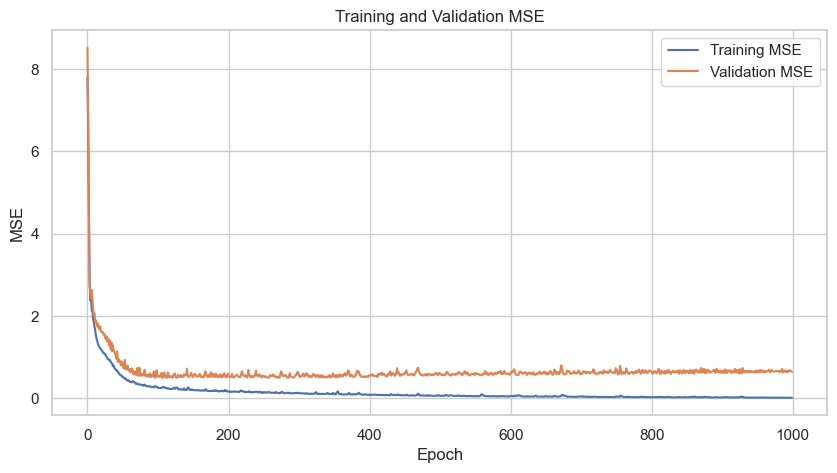

In [60]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [61]:
y_pred = model.predict(X_test, verbose=0)
r21 = r2_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.7500075224514471 / 1.0
MSE score =  0.9988656501966885 / 0.0


In [62]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M1 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.927737,0.9
1,Steven Adams,2.752148,2.3
2,Bam Adebayo,3.583053,3.2
3,Santi Aldama,1.824755,1.3
4,Nickeil Alexander-Walker,0.794833,1.8
...,...,...,...
712,Thaddeus Young,2.716254,1.4
713,Trae Young,10.245923,10.2
714,Omer Yurtseven,0.359744,0.2
715,Cody Zeller,1.875636,0.7


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


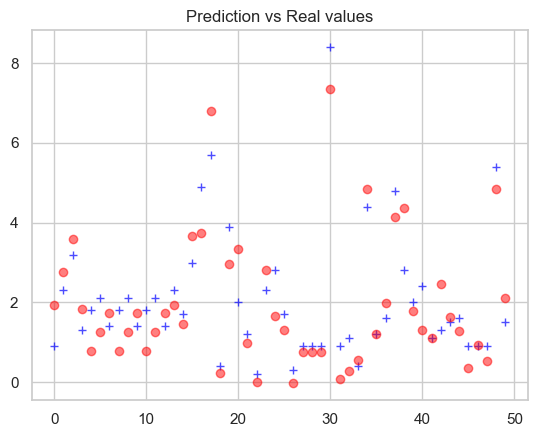

In [63]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Two (More Layers)

In [64]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(175, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(75, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 200)               12400     
                                                                 
 dense_19 (Dense)            (None, 175)               35175     
                                                                 
 dense_20 (Dense)            (None, 150)               26400     
                                                                 
 dense_21 (Dense)            (None, 100)               15100     
                                                                 
 dense_22 (Dense)            (None, 75)                7575      
                                                                 
 dense_23 (Dense)            (None, 50)                3800      
                                                                 
 dense_24 (Dense)            (None, 25)               

In [65]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0214 - mse: 0.0214
Training MSE: 0.021363895386457443
23/23 [==============================] - 0s 1ms/step - loss: 0.7795 - mse: 0.7795
Validation MSE: 0.7795085906982422 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040
Training MSE: 0.004005859140306711
23/23 [==============================] - 0s 1ms/step - loss: 0.7676 - mse: 0.7676
Validation MSE: 0.767573893070221 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.0323e-04 - mse: 1.0323e-04
Training MSE: 0.000103230238892138
23/23 [==============================] - 0s 980us/step - loss: 0.7630 - mse: 0.7630
Validation MSE: 0.7630382180213928 

Step :  750 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044
Training MSE: 0.004436118062585592
23/23 [==============================] - 0s 993us/step - loss: 0.7909 - mse: 0.7909
Validati

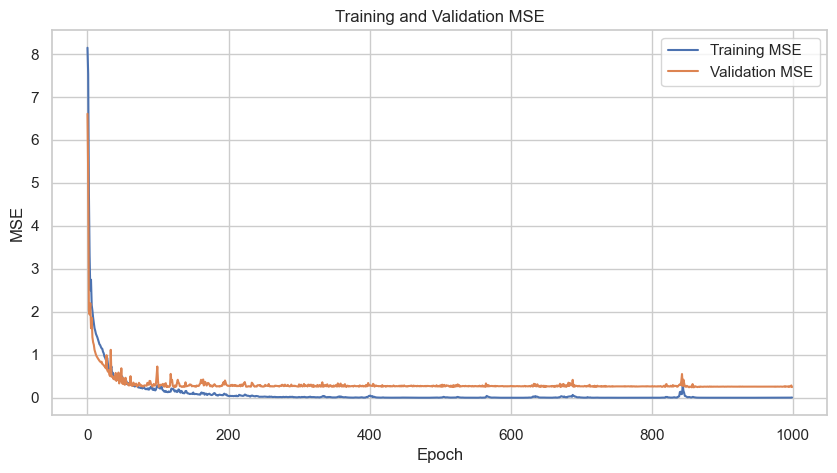

In [66]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [67]:
y_pred = model.predict(X_test, verbose=0)
r22 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8020628138786073 / 1.0
MSE score =  0.7908744217107435 / 0.0


In [68]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M2 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.376960,0.9
1,Steven Adams,1.754503,2.3
2,Bam Adebayo,3.649623,3.2
3,Santi Aldama,1.365464,1.3
4,Nickeil Alexander-Walker,0.785838,1.8
...,...,...,...
712,Thaddeus Young,1.388101,1.4
713,Trae Young,10.059707,10.2
714,Omer Yurtseven,0.117001,0.2
715,Cody Zeller,1.086009,0.7


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


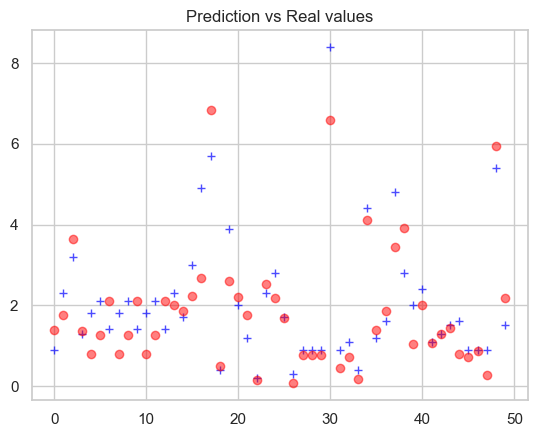

In [69]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Three (Different Optimizer)

In [70]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(175, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(75, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer= SGD(lr=0.001), metrics=['mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 200)               12400     
                                                                 
 dense_27 (Dense)            (None, 175)               35175     
                                                                 
 dense_28 (Dense)            (None, 150)               26400     
                                                                 
 dense_29 (Dense)            (None, 100)               15100     
                                                                 
 dense_30 (Dense)            (None, 75)                7575      
                                                                 
 dense_31 (Dense)            (None, 50)                3800      
                                                                 
 dense_32 (Dense)            (None, 25)               

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [71]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.9704 - mse: 1.9704
Training MSE: 1.9704071283340454
23/23 [==============================] - 0s 3ms/step - loss: 2.2572 - mse: 2.2572
Validation MSE: 2.257195234298706 

Step :  250 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.3644 - mse: 1.3644
Training MSE: 1.364424467086792
23/23 [==============================] - 0s 1ms/step - loss: 1.8056 - mse: 1.8056
Validation MSE: 1.8056097030639648 

Step :  500 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1782 - mse: 1.1782
Training MSE: 1.178239107131958
23/23 [==============================] - 0s 1ms/step - loss: 1.6759 - mse: 1.6759
Validation MSE: 1.6759446859359741 

Step :  750 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1832 - mse: 1.1832
Training MSE: 1.1832445859909058
23/23 [==============================] - 0s 937us/step - loss: 1.5698 - mse: 1.5698
Validation MSE: 1.5697673559

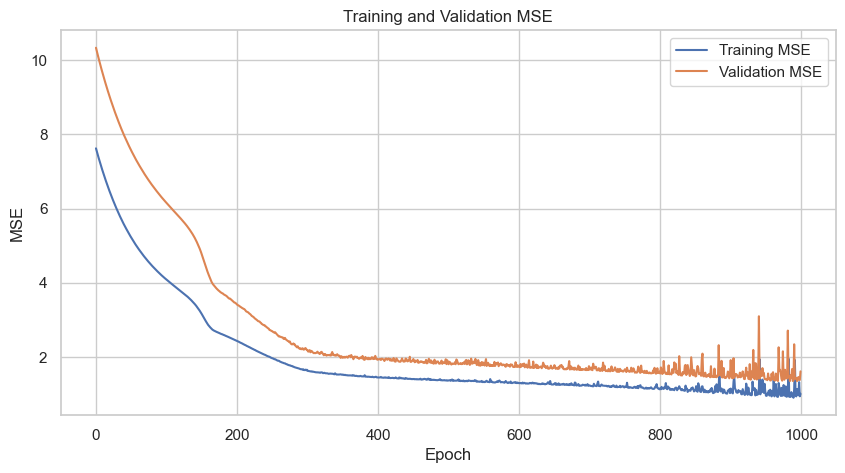

In [72]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [73]:
y_pred = model.predict(X_test, verbose=0)
r23 = r2_score(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.6071243391700201 / 1.0
MSE score =  1.5697672435970589 / 0.0


In [74]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M3 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.771907,0.9
1,Steven Adams,2.051416,2.3
2,Bam Adebayo,5.116183,3.2
3,Santi Aldama,1.968932,1.3
4,Nickeil Alexander-Walker,1.608302,1.8
...,...,...,...
712,Thaddeus Young,1.276329,1.4
713,Trae Young,9.011071,10.2
714,Omer Yurtseven,0.804202,0.2
715,Cody Zeller,1.458244,0.7


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


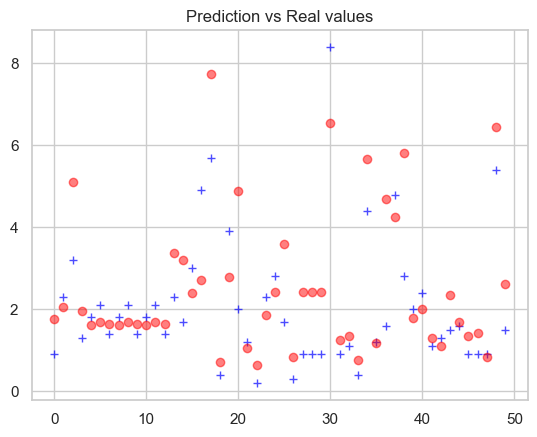

In [75]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Comparison

In [76]:
comparison_df = pd.concat([predictions_dbl,predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,Baseline_Predicted_AST_2022,M1 - Predicted_AST_2022,M2 - Predicted_AST_2022,M3 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.464967,1.927737,1.376960,1.771907,0.9
1,Steven Adams,3.081372,2.752148,1.754503,2.051416,2.3
2,Bam Adebayo,4.397806,3.583053,3.649623,5.116183,3.2
3,Santi Aldama,1.234872,1.824755,1.365464,1.968932,1.3
4,Nickeil Alexander-Walker,1.420898,0.794833,0.785838,1.608302,1.8
...,...,...,...,...,...,...
712,Thaddeus Young,1.742759,2.716254,1.388101,1.276329,1.4
713,Trae Young,9.131890,10.245923,10.059707,9.011071,10.2
714,Omer Yurtseven,-0.071558,0.359744,0.117001,0.804202,0.2
715,Cody Zeller,0.836932,1.875636,1.086009,1.458244,0.7


In [77]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Baseline (Linear Regression)','One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'MSE': [msebl,mse1, mse2, mse3],
    'R2 Score': [r_squaredbl, r21, r22, r23]
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                          Model       MSE  R2 Score
0  Baseline (Linear Regression)  0.764194  0.748455
1                One (3 Layers)  0.998866  0.750008
2             Two (More Layers)  0.790874  0.802063
3         Three (SGD Optimizer)  1.569767  0.607124


# Baseline TRB (Linear Regression)

In [78]:
features_2021 = [col for col in merged_data.columns if '_2021' in col and col not in ('TRB_2021', 'Player', 'Rk_2021')]
features_2022 = [col.replace('_2021', '_2022') for col in features_2021]

target_2021 = 'TRB_2021'
target_2022 = 'TRB_2022'

# Training set from 2021
X_train = merged_data[features_2021]
y_train = merged_data[target_2021]

# Testing set from 2022
X_test = merged_data[features_2022]
y_test = merged_data[target_2022]

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

X_test.columns = [col.replace('_2022', '_2021') for col in X_test.columns]
y_pred = model.predict(X_test)

msebl = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(msebl)
mae = mean_absolute_error(y_pred, y_test)
r_squaredbl = r2_score(y_pred, y_test)

print("Mean Squared Error:", msebl)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squaredbl)

Mean Squared Error: 0.0027503170786282384
Root Mean Squared Error: 0.05244346554746586
Mean Absolute Error: 0.03454319089531099
R-squared: 0.9994683178474395


In [80]:
predictions_dfbl = pd.DataFrame({'Baseline_Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_dfbl, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,Baseline_Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.888036,6.0
1,Steven Adams,11.551182,11.5
2,Bam Adebayo,9.251071,9.2
3,Santi Aldama,4.812282,4.8
4,Nickeil Alexander-Walker,1.800920,1.7
...,...,...,...
712,Thaddeus Young,3.070187,3.1
713,Trae Young,2.999013,3.0
714,Omer Yurtseven,2.611259,2.6
715,Cody Zeller,4.336644,4.3


# Neural Network Model for Rebound Prediction

## Model One (3 Layers)

In [81]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu')) 
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                3968      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [82]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0) 
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Training MSE: 0.0016277394024655223
23/23 [==============================] - 0s 860us/step - loss: 0.0072 - mse: 0.0072
Validation MSE: 0.0072433073073625565 

Step :  250 / 1000
18/18 [==============================] - 0s 908us/step - loss: 0.0019 - mse: 0.0019
Training MSE: 0.001888174912892282
23/23 [==============================] - 0s 919us/step - loss: 0.0069 - mse: 0.0069
Validation MSE: 0.006900144275277853 

Step :  500 / 1000
18/18 [==============================] - 0s 887us/step - loss: 0.0044 - mse: 0.0044
Training MSE: 0.0044324989430606365
23/23 [==============================] - 0s 864us/step - loss: 0.0097 - mse: 0.0097
Validation MSE: 0.00971141830086708 

Step :  750 / 1000
18/18 [==============================] - 0s 938us/step - loss: 4.8527e-04 - mse: 4.8527e-04
Training MSE: 0.00048527345643378794
23/23 [==============================] - 0s 915us/step - loss: 0.0071 -

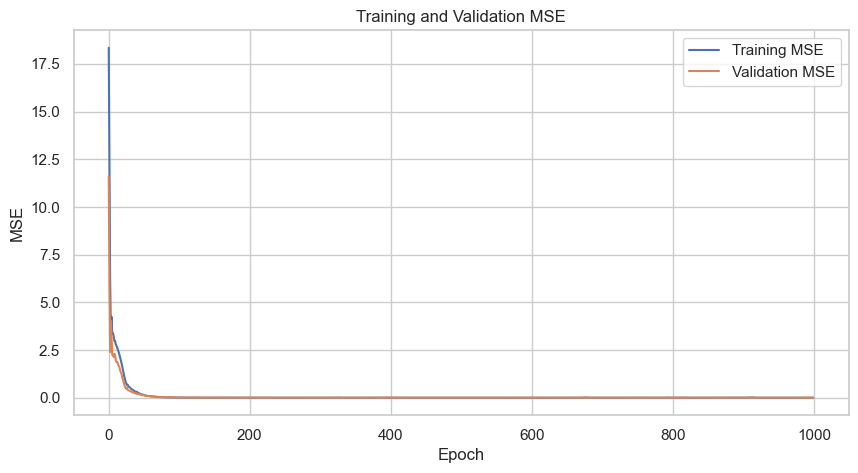

In [83]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [84]:
y_pred = model.predict(X_test, verbose=0)
r21 = r2_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.9986309334955153 / 1.0
MSE score =  0.007079565026770168 / 0.0


In [85]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M1 - Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.829445,6.0
1,Steven Adams,11.521865,11.5
2,Bam Adebayo,9.274821,9.2
3,Santi Aldama,4.841851,4.8
4,Nickeil Alexander-Walker,1.766284,1.7
...,...,...,...
712,Thaddeus Young,3.092044,3.1
713,Trae Young,2.990555,3.0
714,Omer Yurtseven,2.546115,2.6
715,Cody Zeller,4.346085,4.3


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


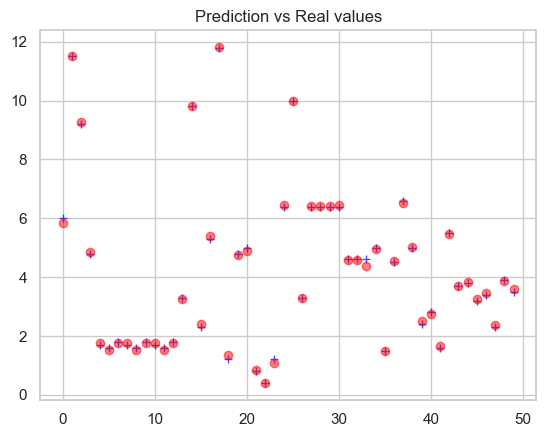

In [86]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Two (More Layers)

In [87]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 200)               12400     
                                                                 
 dense_38 (Dense)            (None, 150)               30150     
                                                                 
 dense_39 (Dense)            (None, 100)               15100     
                                                                 
 dense_40 (Dense)            (None, 50)                5050      
                                                                 
 dense_41 (Dense)            (None, 25)                1275      
                                                                 
 dense_42 (Dense)            (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

In [88]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047
Training MSE: 0.004671360831707716
23/23 [==============================] - 0s 1ms/step - loss: 0.0115 - mse: 0.0115
Validation MSE: 0.011471163481473923 

Step :  250 / 1000
15/15 [==============================] - 0s 996us/step - loss: 9.5671e-04 - mse: 9.5671e-04
Training MSE: 0.0009567097295075655
23/23 [==============================] - 0s 923us/step - loss: 0.0080 - mse: 0.0080
Validation MSE: 0.007978896610438824 

Step :  500 / 1000
15/15 [==============================] - 0s 994us/step - loss: 0.0013 - mse: 0.0013
Training MSE: 0.0012595475418493152
23/23 [==============================] - 0s 969us/step - loss: 0.0085 - mse: 0.0085
Validation MSE: 0.00851031206548214 

Step :  750 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Training MSE: 0.0016260807169601321
23/23 [==============================] - 0s 1ms/step - loss: 0.0081 - mse: 0.

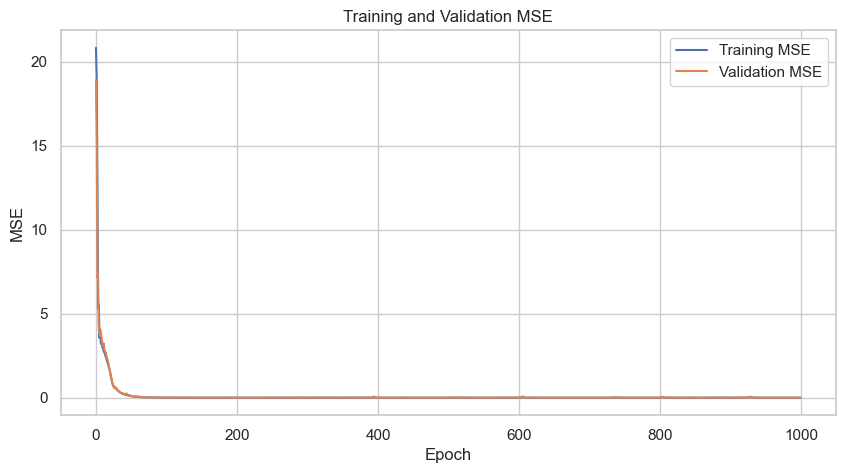

In [89]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [90]:
y_pred = model.predict(X_test, verbose=0)
r22 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.998428222333091 / 1.0
MSE score =  0.008127802531182518 / 0.0


In [91]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M2 - Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.832380,6.0
1,Steven Adams,11.507457,11.5
2,Bam Adebayo,9.241648,9.2
3,Santi Aldama,4.820298,4.8
4,Nickeil Alexander-Walker,1.811485,1.7
...,...,...,...
712,Thaddeus Young,3.098219,3.1
713,Trae Young,3.013406,3.0
714,Omer Yurtseven,2.516097,2.6
715,Cody Zeller,4.252131,4.3


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


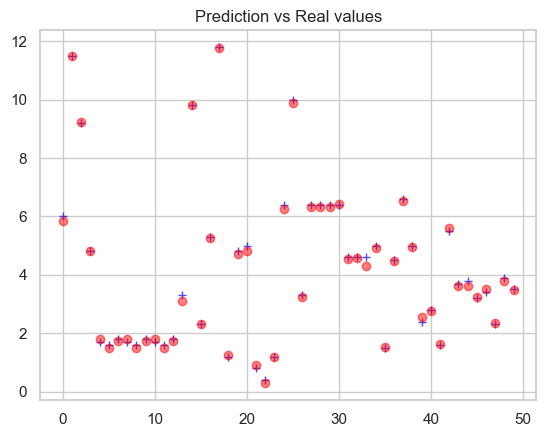

In [92]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Three (Different Optimizer)

In [93]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer= SGD(lr=0.001), metrics=['mse'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 200)               12400     
                                                                 
 dense_44 (Dense)            (None, 150)               30150     
                                                                 
 dense_45 (Dense)            (None, 100)               15100     
                                                                 
 dense_46 (Dense)            (None, 50)                5050      
                                                                 
 dense_47 (Dense)            (None, 25)                1275      
                                                                 
 dense_48 (Dense)            (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [94]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 2.1570 - mse: 2.1570
Training MSE: 2.1569900512695312
23/23 [==============================] - 0s 978us/step - loss: 2.5035 - mse: 2.5035
Validation MSE: 2.5034542083740234 

Step :  250 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2503 - mse: 0.2503
Training MSE: 0.25031402707099915
23/23 [==============================] - 0s 1ms/step - loss: 0.3297 - mse: 0.3297
Validation MSE: 0.3297111988067627 

Step :  500 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4472 - mse: 0.4472
Training MSE: 0.44718992710113525
23/23 [==============================] - 0s 1ms/step - loss: 0.5658 - mse: 0.5658
Validation MSE: 0.5657530426979065 

Step :  750 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0852 - mse: 0.0852
Training MSE: 0.08520938456058502
23/23 [==============================] - 0s 1ms/step - loss: 0.1583 - mse: 0.1583
Validation MSE: 0.1583

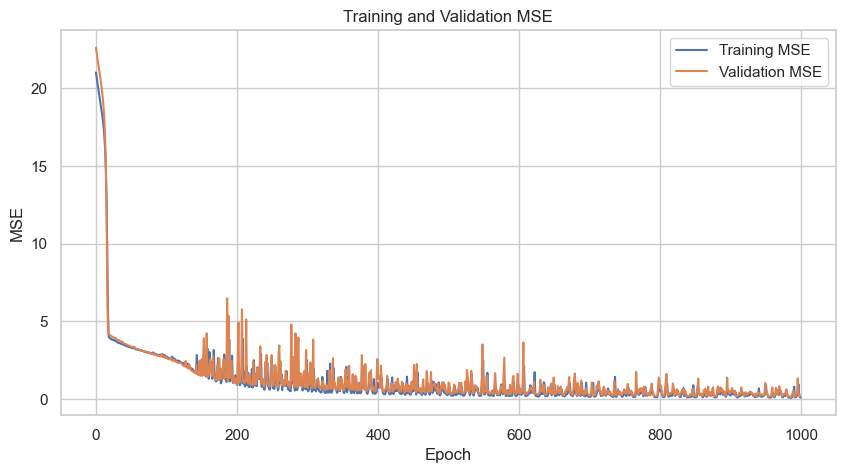

In [95]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [96]:
y_pred = model.predict(X_test, verbose=0)
r23 = r2_score(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.9693811674630058 / 1.0
MSE score =  0.15833271450245348 / 0.0


In [97]:
predictions_df3 = pd.DataFrame({'Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.759861,6.0
1,Steven Adams,10.438980,11.5
2,Bam Adebayo,10.108681,9.2
3,Santi Aldama,4.416666,4.8
4,Nickeil Alexander-Walker,2.122116,1.7
...,...,...,...
712,Thaddeus Young,2.951547,3.1
713,Trae Young,4.034590,3.0
714,Omer Yurtseven,2.606559,2.6
715,Cody Zeller,4.333986,4.3


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_73205/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


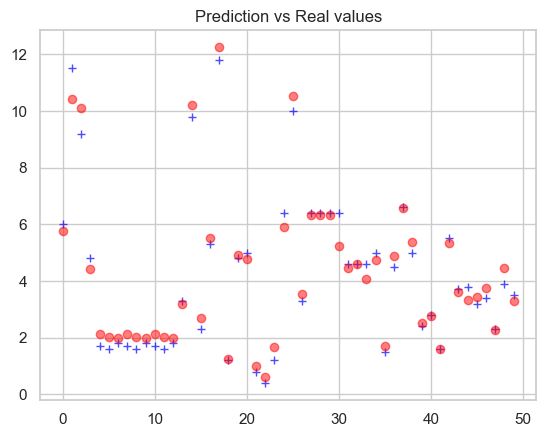

In [98]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Comparison

In [99]:
comparison_df = pd.concat([predictions_dfbl,predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,Baseline_Predicted_TRB_2022,M1 - Predicted_TRB_2022,M2 - Predicted_TRB_2022,Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.888036,5.829445,5.832380,5.759861,6.0
1,Steven Adams,11.551182,11.521865,11.507457,10.438980,11.5
2,Bam Adebayo,9.251071,9.274821,9.241648,10.108681,9.2
3,Santi Aldama,4.812282,4.841851,4.820298,4.416666,4.8
4,Nickeil Alexander-Walker,1.800920,1.766284,1.811485,2.122116,1.7
...,...,...,...,...,...,...
712,Thaddeus Young,3.070187,3.092044,3.098219,2.951547,3.1
713,Trae Young,2.999013,2.990555,3.013406,4.034590,3.0
714,Omer Yurtseven,2.611259,2.546115,2.516097,2.606559,2.6
715,Cody Zeller,4.336644,4.346085,4.252131,4.333986,4.3


In [100]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Baseline (Linear Regression)','One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'MSE': [msebl,mse1, mse2, mse3],
    'R2 Score': [r_squaredbl, r21, r22, r23]
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                          Model       MSE  R2 Score
0  Baseline (Linear Regression)  0.002750  0.999468
1                One (3 Layers)  0.007080  0.998631
2             Two (More Layers)  0.008128  0.998428
3         Three (SGD Optimizer)  0.158333  0.969381


# Neural Network Model for Predicting Player Position 2021-2022 Season

## Baseline (Logistic Regression)

In [101]:
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train_labels = y_train.values.argmax(axis=1)
y_test_labels = y_test.values.argmax(axis=1)


log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(X_train, y_train_labels)
y_pred_labels = log_reg.predict(X_test)

# Evaluate the model
accuracybl = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracybl)


Accuracy: 0.5277777777777778


## Model One (3 Layers)

In [102]:
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [104]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.7242 - accuracy: 0.7620
Training Loss: 0.7241696119308472
Training Accuracy: 0.7620087265968323
5/5 [==============================] - 0s 2ms/step - loss: 1.0743 - accuracy: 0.5347
Validation Loss: 1.074321985244751
Validation Accuracy: 0.5347222089767456 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.8079
Training Loss: 0.5483017563819885
Training Accuracy: 0.807860255241394
5/5 [==============================] - 0s 1ms/step - loss: 1.1316 - accuracy: 0.5694
Validation Loss: 1.1316105127334595
Validation Accuracy: 0.5694444179534912 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8668
Training Loss: 0.44467833638191223
Training Accuracy: 0.8668122291564941
5/5 [==============================] - 0s 1ms/step - loss: 1.2044 - accuracy: 0.5972
Validation Loss: 1.2044309377670288
Validation Accuracy: 0

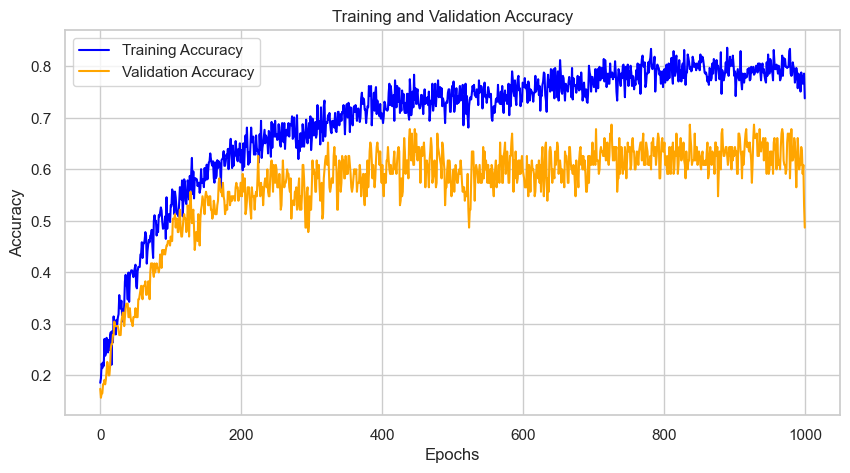

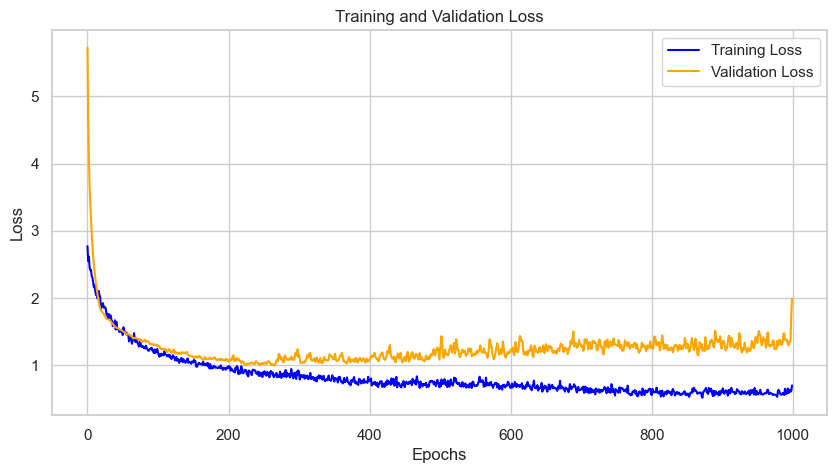

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
y_pred = model.predict(X_test, verbose=0)

In [107]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [108]:
y_pred_discrete

array([2, 0, 2, 3, 3, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 3, 1,
       3, 3, 0, 1, 2, 0, 0, 0, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 3, 1, 2, 0, 3,
       2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 3, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1,
       3, 2, 0, 0, 2, 0, 2, 1, 1, 3, 2, 3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 4, 1, 0, 2, 0, 2])

In [109]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2021': 0, 'Pos_PF_2021': 1, 'Pos_PG_2021': 2, 'Pos_SF_2021': 3, 'Pos_SG_2021': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [110]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_POS_2021': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2021': y_test_mapped.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M1 - Predicted_POS_2021', 'True_POS_2021'])
filtered_df

,Player,M1 - Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,2.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,2.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,2.0,4.0
142,Anthony Davis,0.0,0.0


In [111]:
y_pred = filtered_df['M1 - Predicted_POS_2021']
y_true = filtered_df['True_POS_2021']

# Compute accuracy score
accuracy1 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy1)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.4930555555555556
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        24
         1.0       0.58      0.56      0.57        27
         2.0       0.32      1.00      0.48        23
         3.0       0.65      0.32      0.43        34
         4.0       0.00      0.00      0.00        36

    accuracy                           0.49       144
   macro avg       0.47      0.56      0.47       144
weighted avg       0.45      0.49      0.43       144



## Model Two (More Layers)

In [112]:
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# Building a more complex model
model = Sequential([
    Dense(200, activation='relu', input_dim=57),
    BatchNormalization(),
    Dropout(0.5),
    Dense(175, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(150, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 200)               11600     
                                                                 
 batch_normalization_2 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_53 (Dense)            (None, 175)               35175     
                                                                 
 batch_normalization_3 (Batc  (None, 175)              700       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 175)             

In [114]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.9593 - accuracy: 0.5677
Training Loss: 0.9593217968940735
Training Accuracy: 0.567685604095459
5/5 [==============================] - 0s 2ms/step - loss: 1.0901 - accuracy: 0.5139
Validation Loss: 1.090103268623352
Validation Accuracy: 0.5138888955116272 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.8035
Training Loss: 0.5862802267074585
Training Accuracy: 0.8034934401512146
5/5 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.6250
Validation Loss: 1.0182695388793945
Validation Accuracy: 0.625 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8755
Training Loss: 0.3922858238220215
Training Accuracy: 0.875545859336853
5/5 [==============================] - 0s 2ms/step - loss: 1.0748 - accuracy: 0.5972
Validation Loss: 1.07477867603302
Validation Accuracy: 0.5972222089767456

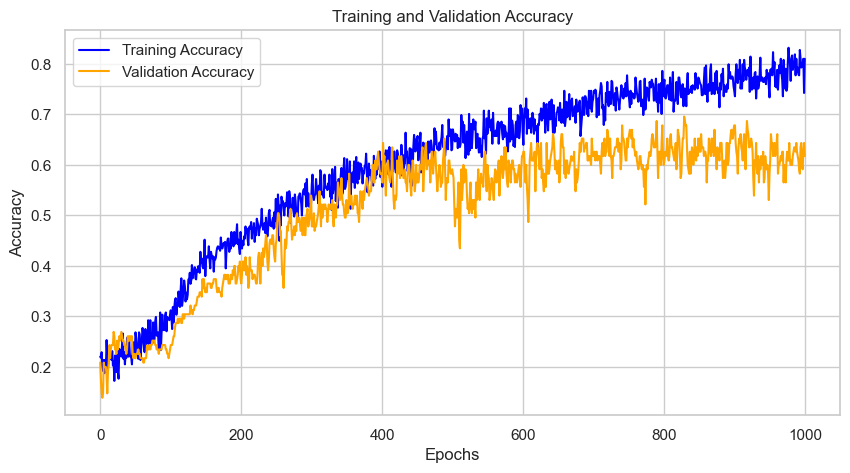

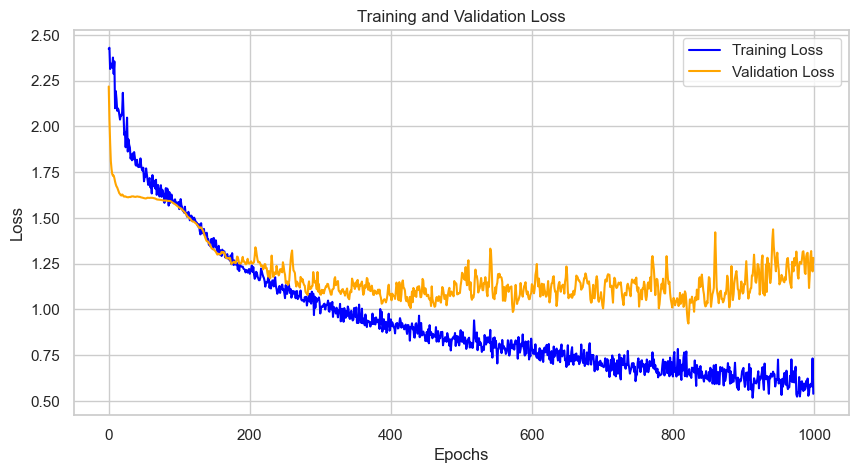

In [115]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
y_pred = model.predict(X_test, verbose=0)

In [117]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [118]:
y_pred_discrete

array([4, 0, 4, 4, 3, 4, 0, 1, 3, 4, 1, 0, 3, 0, 1, 0, 2, 2, 2, 4, 3, 1,
       3, 3, 0, 3, 4, 0, 0, 0, 3, 4, 4, 1, 1, 4, 1, 2, 4, 3, 4, 3, 2, 1,
       4, 4, 2, 2, 3, 4, 0, 2, 0, 0, 1, 4, 0, 2, 4, 4, 4, 1, 1, 1, 0, 3,
       4, 2, 2, 0, 1, 3, 2, 1, 2, 4, 3, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1,
       3, 2, 0, 0, 3, 0, 1, 0, 0, 3, 4, 1, 0, 1, 0, 4, 2, 4, 1, 3, 2, 2,
       1, 0, 0, 0, 4, 4, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 1, 4, 0, 2, 3, 4,
       4, 1, 4, 2, 0, 3, 4, 1, 0, 4, 0, 2])

In [119]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2021': 0, 'Pos_PF_2021': 1, 'Pos_PG_2021': 2, 'Pos_SF_2021': 3, 'Pos_SG_2021': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [120]:
predictions_df2 = pd.DataFrame({'M2 -Predicted_POS_2021': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2021': y_test_mapped.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M2 -Predicted_POS_2021', 'True_POS_2021'])
filtered_df

,Player,M2 -Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,4.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,0.0,0.0


In [121]:
y_pred = filtered_df['M2 -Predicted_POS_2021']
y_true = filtered_df['True_POS_2021']

# Compute accuracy score
accuracy2 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy2)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.6111111111111112
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.96      0.82        24
         1.0       0.50      0.52      0.51        27
         2.0       0.64      0.78      0.71        23
         3.0       0.54      0.38      0.45        34
         4.0       0.62      0.56      0.59        36

    accuracy                           0.61       144
   macro avg       0.61      0.64      0.61       144
weighted avg       0.60      0.61      0.60       144



## Model Three (Different Optimizer)

In [122]:
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 32)              

In [124]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.2306 - accuracy: 0.5306
Training Loss: 1.230607271194458
Training Accuracy: 0.5305677056312561
5/5 [==============================] - 0s 2ms/step - loss: 1.2690 - accuracy: 0.5139
Validation Loss: 1.2689720392227173
Validation Accuracy: 0.5138888955116272 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.0790 - accuracy: 0.5699
Training Loss: 1.0789557695388794
Training Accuracy: 0.5698689818382263
5/5 [==============================] - 0s 2ms/step - loss: 1.1296 - accuracy: 0.5833
Validation Loss: 1.1295913457870483
Validation Accuracy: 0.5833333134651184 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.2468 - accuracy: 0.5044
Training Loss: 1.24680495262146
Training Accuracy: 0.5043668150901794
5/5 [==============================] - 0s 1ms/step - loss: 1.2386 - accuracy: 0.4722
Validation Loss: 1.2385752201080322
Validation Accuracy: 0.4

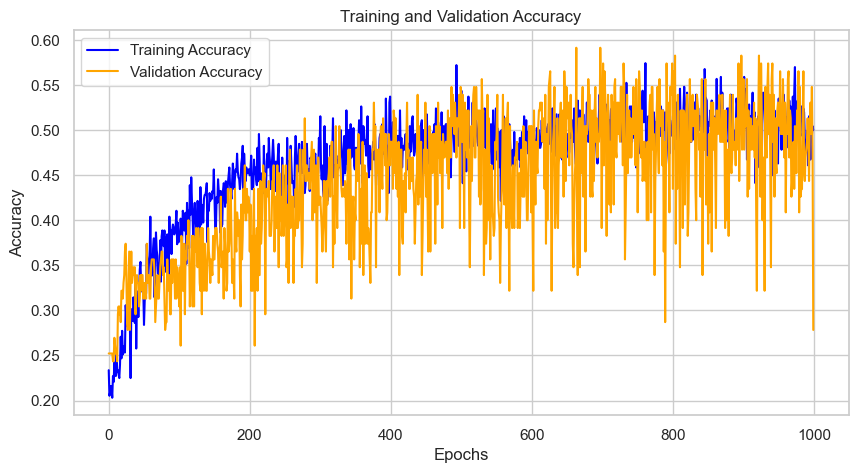

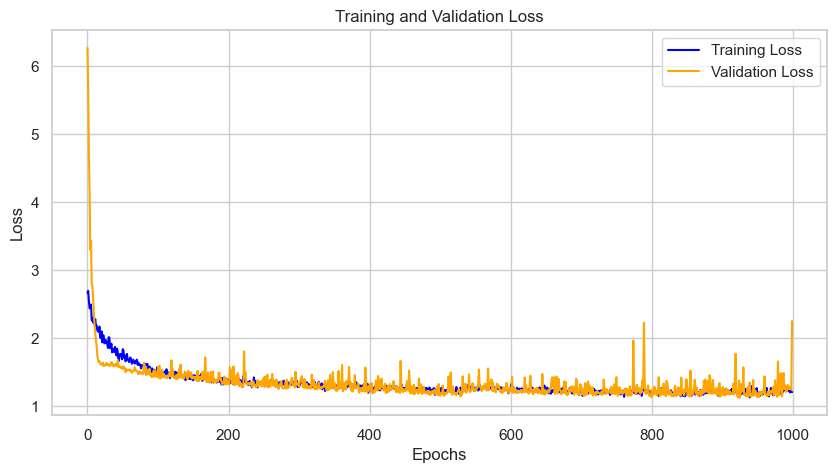

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
y_pred = model.predict(X_test, verbose=0)

In [127]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [128]:
y_pred_discrete

array([2, 1, 2, 3, 2, 2, 0, 4, 4, 2, 2, 4, 2, 0, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 0, 3, 2, 4, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 0, 3,
       2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 4, 0, 2, 2, 2, 2, 4, 2, 1, 2, 4, 4,
       4, 2, 0, 0, 2, 3, 2, 1, 4, 4, 2, 4, 4, 3, 4, 2, 2, 2, 4, 3, 2, 2,
       2, 0, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 4, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 4, 3, 4, 2, 0, 2, 3, 2])

In [129]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2021': 0, 'Pos_PF_2021': 1, 'Pos_PG_2021': 2, 'Pos_SF_2021': 3, 'Pos_SG_2021': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [130]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_POS_2021': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2021': y_test_mapped.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M3 - Predicted_POS_2021', 'True_POS_2021'])
filtered_df

,Player,M3 - Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,2.0,4.0
1,Steven Adams,1.0,0.0
2,Bam Adebayo,2.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,2.0,3.0
...,...,...,...
139,Seth Curry,2.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,2.0,4.0
142,Anthony Davis,3.0,0.0


In [131]:
y_pred = filtered_df['M3 - Predicted_POS_2021']
y_true = filtered_df['True_POS_2021']

# Compute accuracy score
accuracy3 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy3)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.2777777777777778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.38      0.50        24
         1.0       0.50      0.07      0.13        27
         2.0       0.26      1.00      0.42        23
         3.0       0.50      0.15      0.23        34
         4.0       0.03      0.03      0.03        36

    accuracy                           0.28       144
   macro avg       0.41      0.32      0.26       144
weighted avg       0.39      0.28      0.24       144



## Model Comparison

In [132]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_POS_2021,M2 -Predicted_POS_2021,M3 - Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,2.0,4.0,2.0,4.0
1,Steven Adams,0.0,0.0,1.0,0.0
2,Bam Adebayo,2.0,4.0,2.0,4.0
3,Santi Aldama,3.0,4.0,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0,2.0,3.0
...,...,...,...,...,...
712,Thaddeus Young,NaN,NaN,NaN,NaN
713,Trae Young,NaN,NaN,NaN,NaN
714,Omer Yurtseven,NaN,NaN,NaN,NaN
715,Cody Zeller,NaN,NaN,NaN,NaN


In [133]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Baseline', 'One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'Accuracy': [accuracybl, accuracy1, accuracy2, accuracy3],
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model  Accuracy
0               Baseline  0.527778
1         One (3 Layers)  0.493056
2      Two (More Layers)  0.611111
3  Three (SGD Optimizer)  0.277778


# Neural Network Model for Predicting Player Position 2022-2023 Season

## Baseline (Logistic Regression)

In [134]:
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train_labels = y_train.values.argmax(axis=1)
y_test_labels = y_test.values.argmax(axis=1)


log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(X_train, y_train_labels)
y_pred_labels = log_reg.predict(X_test)

# Evaluate the model
accuracybl = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracybl)


Accuracy: 0.5694444444444444


## Model One (3 Layers)

In [135]:
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 32)              

In [137]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.8013
Training Loss: 0.656987726688385
Training Accuracy: 0.8013100624084473
5/5 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.6528
Validation Loss: 0.8664574027061462
Validation Accuracy: 0.6527777910232544 

Step :  250 / 1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8799
Training Loss: 0.4360746145248413
Training Accuracy: 0.8799126744270325
5/5 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.6944
Validation Loss: 0.9128078818321228
Validation Accuracy: 0.6944444179534912 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.9192
Training Loss: 0.32568779587745667
Training Accuracy: 0.9192139506340027
5/5 [==============================] - 0s 1ms/step - loss: 0.8829 - accuracy: 0.7014
Validation Loss: 0.8829426169395447
Validation Accuracy: 

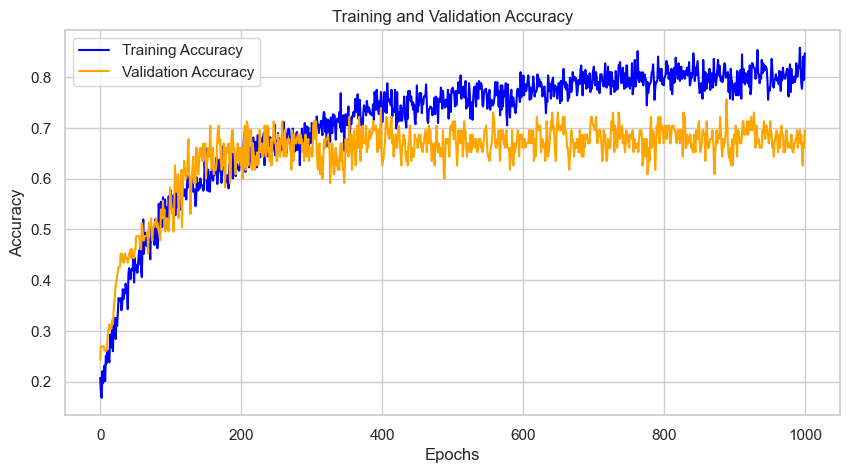

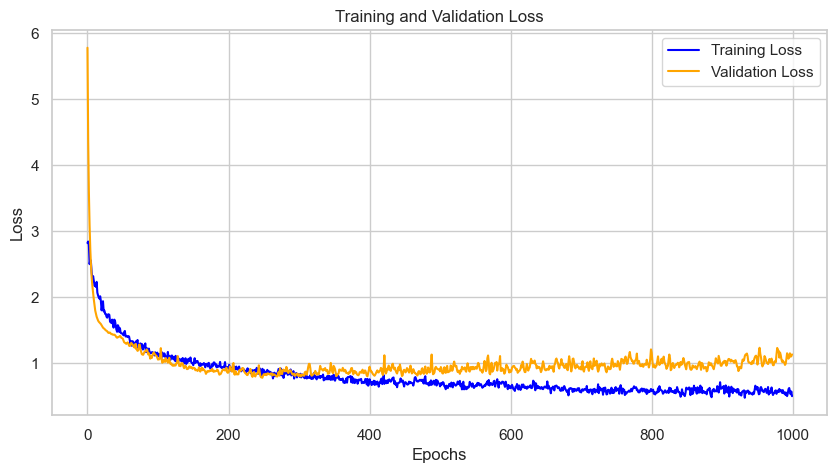

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
y_pred = model.predict(X_test, verbose=0)

In [140]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [141]:
y_pred_discrete

array([4, 0, 4, 3, 3, 3, 0, 1, 3, 4, 4, 0, 3, 0, 3, 0, 2, 2, 2, 4, 1, 3,
       1, 4, 0, 1, 4, 0, 0, 0, 4, 4, 4, 3, 4, 2, 3, 2, 0, 3, 1, 3, 2, 3,
       4, 4, 2, 4, 4, 4, 0, 2, 0, 1, 3, 4, 0, 4, 4, 4, 4, 3, 3, 4, 0, 3,
       2, 2, 2, 3, 3, 4, 2, 0, 4, 3, 0, 1, 2, 2, 2, 0, 0, 2, 1, 4, 0, 3,
       4, 2, 0, 0, 4, 2, 4, 0, 1, 3, 4, 1, 3, 3, 0, 4, 2, 4, 1, 4, 2, 2,
       4, 0, 0, 0, 4, 3, 4, 2, 2, 2, 4, 4, 3, 2, 1, 4, 3, 4, 0, 2, 2, 4,
       2, 4, 4, 2, 0, 1, 4, 1, 0, 4, 0, 2])

In [142]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2022': 0, 'Pos_PF_2022': 1, 'Pos_PG_2022': 2, 'Pos_SF_2022': 3, 'Pos_SG_2022': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [143]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_POS_2022': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2022': y_test_mapped.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M1 - Predicted_POS_2022', 'True_POS_2022'])
filtered_df

,Player,M1 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,0.0,0.0


In [144]:
y_pred = filtered_df['M1 - Predicted_POS_2022']
y_true = filtered_df['True_POS_2022']

# Compute accuracy score
accuracy1 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy1)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7013888888888888
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        28
         1.0       0.71      0.38      0.50        26
         2.0       0.77      0.77      0.77        30
         3.0       0.58      0.56      0.57        27
         4.0       0.64      0.85      0.73        33

    accuracy                           0.70       144
   macro avg       0.71      0.69      0.68       144
weighted avg       0.70      0.70      0.69       144



## Model Two (More Layers)

In [145]:
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
# Building a more complex model
model = Sequential([
    Dense(200, activation='relu', input_dim=57),
    BatchNormalization(),
    Dropout(0.5),
    Dense(175, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(150, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 200)               11600     
                                                                 
 batch_normalization_12 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_66 (Dense)            (None, 175)               35175     
                                                                 
 batch_normalization_13 (Bat  (None, 175)              700       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 175)             

In [147]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.8625 - accuracy: 0.6026
Training Loss: 0.8624630570411682
Training Accuracy: 0.6026200652122498
5/5 [==============================] - 0s 2ms/step - loss: 0.9821 - accuracy: 0.5694
Validation Loss: 0.9820963740348816
Validation Accuracy: 0.5694444179534912 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.8079
Training Loss: 0.5496326088905334
Training Accuracy: 0.807860255241394
5/5 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.7014
Validation Loss: 0.8463003635406494
Validation Accuracy: 0.7013888955116272 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.8035
Training Loss: 0.4760773181915283
Training Accuracy: 0.8034934401512146
5/5 [==============================] - 0s 2ms/step - loss: 0.9460 - accuracy: 0.6736
Validation Loss: 0.9460015892982483
Validation Accuracy: 0

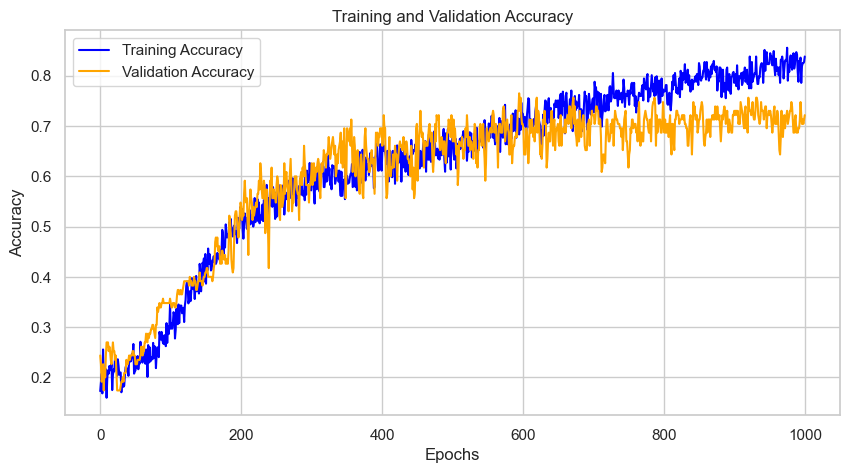

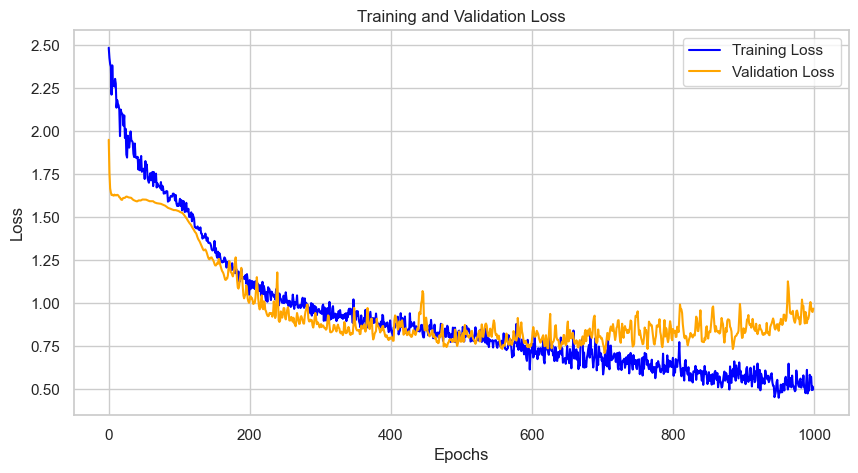

In [148]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
y_pred = model.predict(X_test, verbose=0)

In [150]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [151]:
y_pred_discrete

array([4, 0, 4, 3, 1, 3, 0, 1, 3, 4, 3, 0, 1, 0, 3, 0, 4, 2, 2, 3, 1, 3,
       1, 4, 0, 1, 4, 0, 0, 0, 4, 4, 4, 3, 4, 2, 3, 2, 3, 3, 1, 3, 2, 1,
       4, 4, 4, 4, 4, 3, 0, 2, 0, 0, 3, 4, 1, 2, 4, 4, 4, 4, 3, 4, 0, 3,
       2, 2, 4, 0, 3, 4, 2, 0, 4, 3, 3, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 3,
       3, 1, 0, 0, 4, 4, 4, 0, 0, 1, 2, 1, 1, 3, 0, 4, 2, 4, 1, 1, 4, 2,
       3, 0, 0, 0, 4, 3, 4, 2, 2, 2, 4, 1, 1, 4, 1, 1, 3, 2, 0, 2, 3, 4,
       4, 1, 4, 2, 0, 1, 3, 1, 0, 4, 0, 2])

In [152]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2022': 0, 'Pos_PF_2022': 1, 'Pos_PG_2022': 2, 'Pos_SF_2022': 3, 'Pos_SG_2022': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [153]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_POS_2022': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2022': y_test_mapped.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M2 - Predicted_POS_2022', 'True_POS_2022'])
filtered_df

,Player,M2 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,1.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,0.0,0.0


In [154]:
y_pred = filtered_df['M2 - Predicted_POS_2022']
y_true = filtered_df['True_POS_2022']

# Compute accuracy score
accuracy2 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy2)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7152777777777778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        28
         1.0       0.60      0.58      0.59        26
         2.0       0.92      0.77      0.84        30
         3.0       0.56      0.56      0.56        27
         4.0       0.68      0.79      0.73        33

    accuracy                           0.72       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.72      0.72      0.72       144



## Model Three (Different Optimizer)

In [155]:
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [156]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_19 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 32)              

In [157]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.1530 - accuracy: 0.5480
Training Loss: 1.1529638767242432
Training Accuracy: 0.5480349063873291
5/5 [==============================] - 0s 2ms/step - loss: 1.2220 - accuracy: 0.5278
Validation Loss: 1.2220213413238525
Validation Accuracy: 0.5277777910232544 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.0404 - accuracy: 0.6026
Training Loss: 1.0404212474822998
Training Accuracy: 0.6026200652122498
5/5 [==============================] - 0s 1ms/step - loss: 1.1106 - accuracy: 0.5556
Validation Loss: 1.11056649684906
Validation Accuracy: 0.5555555820465088 

Step :  500 / 1000
15/15 [==============================] - 0s 993us/step - loss: 1.1175 - accuracy: 0.5786
Training Loss: 1.1175401210784912
Training Accuracy: 0.5786026120185852
5/5 [==============================] - 0s 2ms/step - loss: 1.2152 - accuracy: 0.5208
Validation Loss: 1.2152172327041626
Validation Accuracy: 

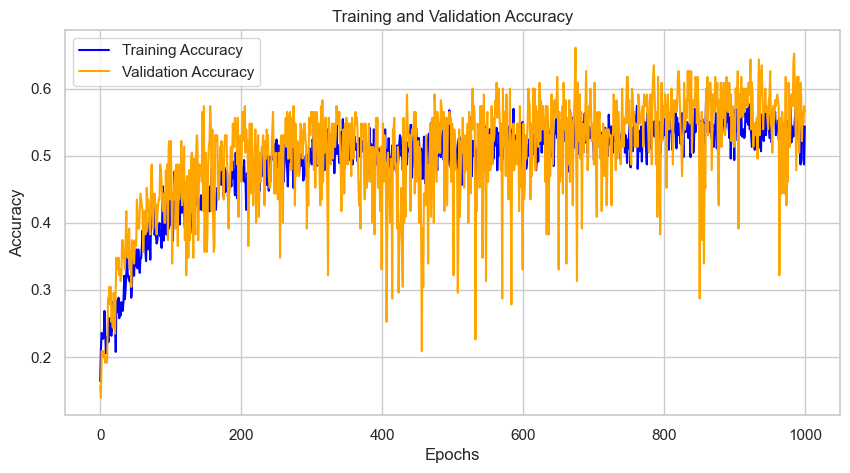

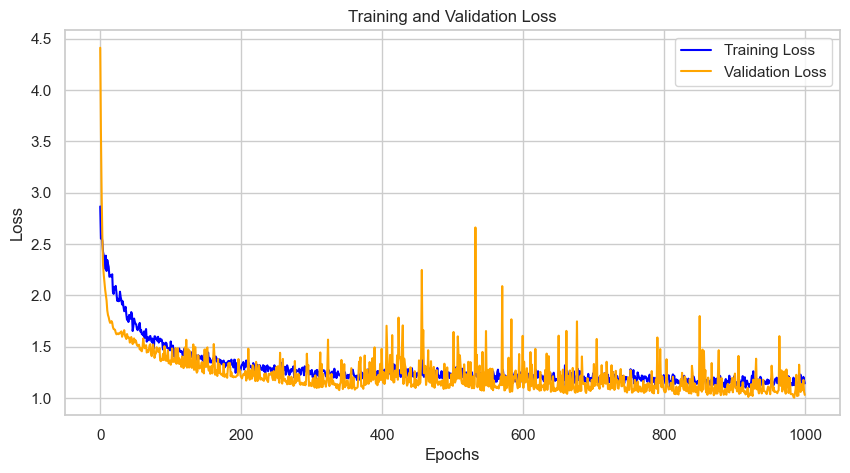

In [158]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
y_pred = model.predict(X_test, verbose=0)

In [160]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [161]:
y_pred_discrete

array([4, 0, 4, 3, 3, 3, 0, 1, 1, 4, 3, 0, 3, 0, 3, 0, 4, 2, 2, 4, 4, 3,
       3, 4, 0, 1, 4, 0, 3, 0, 4, 4, 4, 1, 4, 4, 4, 4, 0, 4, 1, 4, 2, 1,
       4, 4, 4, 4, 4, 4, 0, 2, 0, 3, 3, 4, 0, 4, 4, 4, 4, 3, 3, 4, 0, 1,
       4, 4, 4, 1, 4, 4, 4, 0, 4, 3, 3, 3, 2, 4, 2, 3, 0, 4, 0, 4, 0, 3,
       4, 4, 0, 0, 4, 0, 4, 0, 0, 3, 4, 1, 1, 3, 0, 4, 2, 4, 1, 3, 4, 2,
       3, 0, 0, 0, 4, 3, 3, 2, 4, 2, 3, 3, 4, 4, 1, 1, 0, 4, 0, 2, 4, 4,
       4, 3, 4, 2, 0, 0, 3, 1, 0, 3, 0, 2])

In [162]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2022': 0, 'Pos_PF_2022': 1, 'Pos_PG_2022': 2, 'Pos_SF_2022': 3, 'Pos_SG_2022': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [163]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_POS_2022': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2022': y_test_mapped.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M3 - Predicted_POS_2022', 'True_POS_2022'])
filtered_df

,Player,M3 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,3.0,4.0
142,Anthony Davis,0.0,0.0


In [164]:
y_pred = filtered_df['M3 - Predicted_POS_2022']
y_true = filtered_df['True_POS_2022']

# Compute accuracy score
accuracy3 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy3)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.5902777777777778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        28
         1.0       0.57      0.31      0.40        26
         2.0       1.00      0.43      0.60        30
         3.0       0.41      0.44      0.43        27
         4.0       0.50      0.85      0.63        33

    accuracy                           0.59       144
   macro avg       0.65      0.58      0.57       144
weighted avg       0.65      0.59      0.58       144



## Model Comparison

In [165]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M1 - Predicted_POS_2022,M2 - Predicted_POS_2022,M3 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0,4.0,4.0
1,Steven Adams,0.0,0.0,0.0,0.0
2,Bam Adebayo,4.0,4.0,4.0,4.0
3,Santi Aldama,3.0,3.0,3.0,3.0
4,Nickeil Alexander-Walker,3.0,1.0,3.0,3.0
...,...,...,...,...,...
712,Thaddeus Young,NaN,NaN,NaN,NaN
713,Trae Young,NaN,NaN,NaN,NaN
714,Omer Yurtseven,NaN,NaN,NaN,NaN
715,Cody Zeller,NaN,NaN,NaN,NaN


In [166]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Baseline', 'One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'Accuracy': [accuracybl, accuracy1, accuracy2, accuracy3],
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model  Accuracy
0               Baseline  0.569444
1         One (3 Layers)  0.701389
2      Two (More Layers)  0.715278
3  Three (SGD Optimizer)  0.590278
